In [105]:
#1.Importing Required libraries

#Importing Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
import pylab
import scipy.stats as stats
%matplotlib inline

# models for regression
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor

#Evaluation metrics
from sklearn import metrics
from sklearn.metrics import accuracy_score, mean_absolute_error,r2_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from yellowbrick.regressor import ResidualsPlot
from yellowbrick.regressor import PredictionError

from nltk.corpus import subjectivity
from nltk.sentiment import SentimentAnalyzer
from nltk.sentiment.util import *
from textblob import TextBlob
from datetime import datetime as dt


In [148]:
#2. Reading the csv
dataset = pd.read_csv('C:\\Users\\Pravinaben\\Desktop\\MON\\listings.csv')

C:\Users\Pravinaben\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3049: DtypeWarning: Columns (61,62) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [70]:
dataset.head(2)

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,instant_bookable,is_business_travel_ready,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,2078,https://www.airbnb.com/rooms/2078,20190713020741,2019-07-13,Central comfy close to Metro Laurie,Centrally located in trendy Le Plateau. Join...,Centrally located clean comfy furnished room ...,Centrally located in trendy Le Plateau. Join...,none,Although my place is centrally located in Le P...,...,t,f,flexible,f,f,1,0,1,0,2.56
1,2843,https://www.airbnb.com/rooms/2843,20190713020741,2019-07-13,Fabulous downtown/airport room,Come stay in this trendy area of downtown Mont...,"Private individual room in the downtown area, ...",Come stay in this trendy area of downtown Mont...,none,This area of St Henri is actually downtown Mon...,...,t,f,moderate,f,f,6,3,3,0,1.02


In [180]:
#3.1 Taking all the necessary Features
columns = ['id',
           'cancellation_policy',
           'security_deposit',
           'host_is_superhost',
           'cleaning_fee',
           'guests_included',
           'number_of_reviews',
           'price',
           'property_type',
           'room_type',
           'accommodates',
           'bedrooms',
           'beds',
           'neighbourhood_cleansed',
           'number_of_reviews',
           'review_scores_rating',
           'availability_365',
           'bathrooms',
           'reviews_per_month']
dataset = pd.read_csv('C:\\Users\\Pravinaben\\Desktop\\MON\\listings.csv', usecols=columns)

In [181]:
#3.2 Basic Analysis of dataset

#order of pandas dataframe: Around 21k instances , 11 (independent variables) and 1 ( target variable)

dataset.shape

(21104, 18)

In [6]:
#3.3 first few instances of dataset
dataset.head(5)

,id,host_is_superhost,neighbourhood_cleansed,property_type,room_type,accommodates,bathrooms,bedrooms,beds,price,security_deposit,cleaning_fee,guests_included,availability_365,number_of_reviews,review_scores_rating,instant_bookable,cancellation_policy,reviews_per_month
0,2078,f,Le Plateau-Mont-Royal,House,Private room,2,1.0,1.0,1.0,$39.00,$0.00,$0.00,1,193,245,93.0,t,flexible,2.56
1,2843,f,Le Sud-Ouest,Serviced apartment,Private room,2,1.0,1.0,1.0,$30.00,$134.00,$20.00,1,232,125,88.0,t,moderate,1.02
2,14584,t,Le Plateau-Mont-Royal,Loft,Entire home/apt,4,1.0,1.0,1.0,$175.00,$200.00,$0.00,2,322,157,98.0,f,strict_14_with_grace_period,1.59
3,29059,f,Ville-Marie,Apartment,Entire home/apt,4,1.0,1.0,2.0,$94.00,NaN,$65.00,2,292,293,93.0,f,moderate,2.65
4,29061,f,Ville-Marie,House,Entire home/apt,5,1.0,2.0,3.0,$145.00,NaN,$100.00,2,334,49,92.0,t,moderate,0.54


In [288]:
#3.4 Types of data in the dataframe

dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21104 entries, 0 to 21103
Data columns (total 19 columns):
id                        21104 non-null int64
host_is_superhost         21096 non-null object
neighbourhood_cleansed    21104 non-null object
property_type             21104 non-null object
room_type                 21104 non-null object
accommodates              21104 non-null int64
bathrooms                 21074 non-null float64
bedrooms                  21100 non-null float64
beds                      21077 non-null float64
amenities                 21104 non-null object
price                     21104 non-null object
security_deposit          13946 non-null object
cleaning_fee              16029 non-null object
guests_included           21104 non-null int64
availability_365          21104 non-null int64
number_of_reviews         21104 non-null int64
review_scores_rating      16379 non-null float64
instant_bookable          21104 non-null object
cancellation_policy       21

In [260]:
reviews = pd.read_csv('C:\\Users\\Pravinaben\\Desktop\\MON\\reviews2.csv')


In [ ]:
reviews.head(2)

In [76]:
reviews.isnull().sum()

listing_id         0
id                 0
date               0
reviewer_id        0
reviewer_name      1
comments         249
dtype: int64

In [77]:
reviews = reviews.dropna(how='any', subset=['reviewer_name','comments'])

In [78]:
reviews = reviews.drop('date',axis = 1)
reviews = reviews.drop('reviewer_id',  axis = 1)
reviews = reviews.drop('reviewer_name',  axis = 1)

In [82]:
np.random.seed(10)

remove_n = 412898
#df = pd.DataFrame({"a":[1,2,3,4], "b":[5,6,7,8]})
drop_indices = np.random.choice(reviews.index, remove_n, replace=False)
reviews = reviews.drop(drop_indices)

In [84]:
re = reviews

In [85]:
tok_reviews = re.comments.apply(lambda row: TextBlob(row).sentiment)

In [86]:
re['tok_reviews'] = tok_reviews


In [87]:
re[['polarity', 'subjectivity']] = re['tok_reviews'].apply(pd.Series)

In [88]:
groups = re.groupby(['listing_id'])['polarity'].mean()


In [89]:
#show each listing ID and its polarity score
groups = pd.DataFrame(groups)
int_groups_idx = pd.to_numeric(groups.index)
display(groups)

,polarity
listing_id,
2078,0.417531
2843,0.183333
14584,0.354721
29059,0.466324
29061,0.386623
31847,0.358059
36301,0.571962
38118,0.446000
41819,0.442349


In [104]:
uni = np.unique(groups['id'])
f = len(uni)
print('no. of unique room types = ', f)
print('types of rooms available ', uni)

KeyError: 'id'

In [90]:
groups['idx'] = int_groups_idx

In [91]:
groups.set_index('idx',inplace=True)
display(groups)

,polarity
idx,
2078,0.417531
2843,0.183333
14584,0.354721
29059,0.466324
29061,0.386623
31847,0.358059
36301,0.571962
38118,0.446000
41819,0.442349


In [100]:
groups.shape

(7488, 1)

In [93]:
df_dummies = pd.get_dummies(re)


In [94]:
df_dummies.set_index('listing_id',inplace=True)


In [95]:
df_dummies['sentiment'] = 0.0


In [96]:
n = 0
for i in groups.index:

    df_dummies.loc[i,'sentiment'] = groups.loc[i].polarity
    n += 1
    if (n % 100) == 0:
            print(n)

100
200
300
400
500
600
700
800
900
1000
1100
1200
1300
1400
1500
1600
1700
1800
1900
2000
2100
2200
2300
2400
2500
2600
2700
2800
2900
3000
3100
3200
3300
3400
3500
3600
3700
3800
3900
4000
4100
4200
4300
4400
4500
4600
4700
4800
4900
5000
5100
5200
5300
5400
5500
5600
5700
5800
5900
6000
6100
6200
6300
6400
6500
6600
6700
6800
6900
7000
7100
7200
7300
7400


In [99]:
df_dummies.shape

(21854, 36127)

In [98]:
df_dummies.to_csv('sentiment.csv')

KeyboardInterrupt: 

In [ ]:
rev = pd.read_csv('sentiment.csv')


In [ ]:
dataset = pd.merge(dataset, sentiment, how='inner',left_on = 'id', right_on = 'idx')


In [261]:
dataset['price_log'].median()

4.499809670330265

In [291]:
#3.6 No of listings
dataset.groupby(by='cancellation_policy').count()[['id']].sort_values(by='id', ascending=False).head(10)


,id
cancellation_policy,
strict_14_with_grace_period,8034
flexible,7422
moderate,5638
super_strict_60,6
super_strict_30,2
strict,1


In [68]:
uni = np.unique(dataset['id'])
f = len(uni)
print('no. of unique room types = ', f)
print('types of rooms available ', uni)

no. of unique room types =  21104
types of rooms available  [    2078     2843    14584 ... 36668211 36668787 36672655]


In [182]:
# 4. Exploratory Data Analysis 

#4.1 Histogram plot of data

# convert the price format
dataset['price'] = (dataset['price'].str.replace(r'[^-+\d.]', '').astype(float))
dataset['security_deposit'] = (dataset['security_deposit'].str.replace(r'[^-+\d.]', '').astype(float))
dataset['cleaning_fee'] = (dataset['cleaning_fee'].str.replace(r'[^-+\d.]', '').astype(float))

#dataset.hist(bins=55, figsize= (18,18))
#plt.show

In [110]:
dataset.head(2)

,id,host_is_superhost,host_listings_count,neighbourhood_cleansed,property_type,room_type,accommodates,bathrooms,bedrooms,beds,price,security_deposit,cleaning_fee,guests_included,availability_365,number_of_reviews,review_scores_rating,instant_bookable,cancellation_policy,reviews_per_month
0,2078,f,1.0,Le Plateau-Mont-Royal,House,Private room,2,1.0,1.0,1.0,39.0,0.0,0.0,1,193,245,93.0,t,flexible,2.56
1,2843,f,6.0,Le Sud-Ouest,Serviced apartment,Private room,2,1.0,1.0,1.0,30.0,134.0,20.0,1,232,125,88.0,t,moderate,1.02


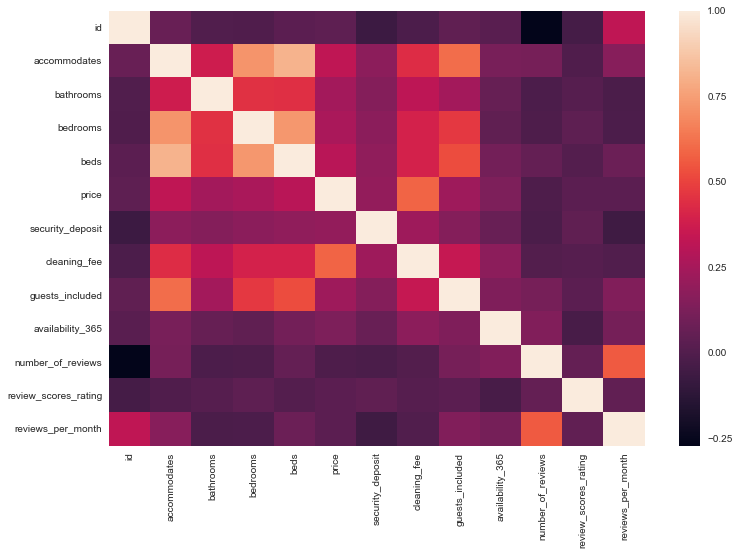

In [183]:
#4.2 Identifing correlation
plt.figure(figsize=(12,8))
sns.heatmap(dataset.corr());
plt.show()

In [184]:
#4.3 Price variable analysis

dataset['price'] = dataset['price'][(dataset['price'] != 0)]
dataset['cleaning_fee'] = dataset['cleaning_fee'][(dataset['cleaning_fee'] != 0)]
dataset['security_deposit'] = dataset['security_deposit'][(dataset['security_deposit'] != 0)]

dataset['price'].max()
dataset['cleaning_fee'].max()
dataset['security_deposit'].max()

6690.0

In [185]:
# Minimum Price
dataset['price'].min()

10.0

In [114]:
# Mean Price
dataset['security_deposit'].max()

6690.0

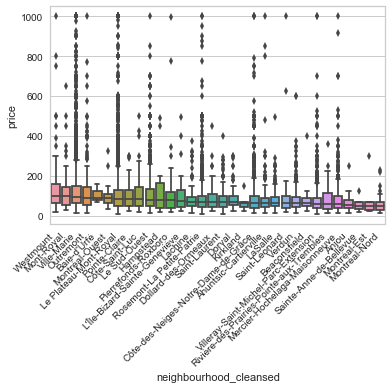

In [124]:
#4.4 Comparing the neighbourhood_cleansed vs price

sort_price = dataset.loc[(dataset.price <= 1000) & (dataset.price > 0)]\
                    .groupby('neighbourhood_cleansed')['price']\
                    .median()\
                    .sort_values(ascending=False)\
                    .index
sns.boxplot(y='price', x='neighbourhood_cleansed', data=dataset.loc[(dataset.price <= 1000) & (dataset.price > 0)], 
            order=sort_price)
ax = plt.gca()
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
plt.show();


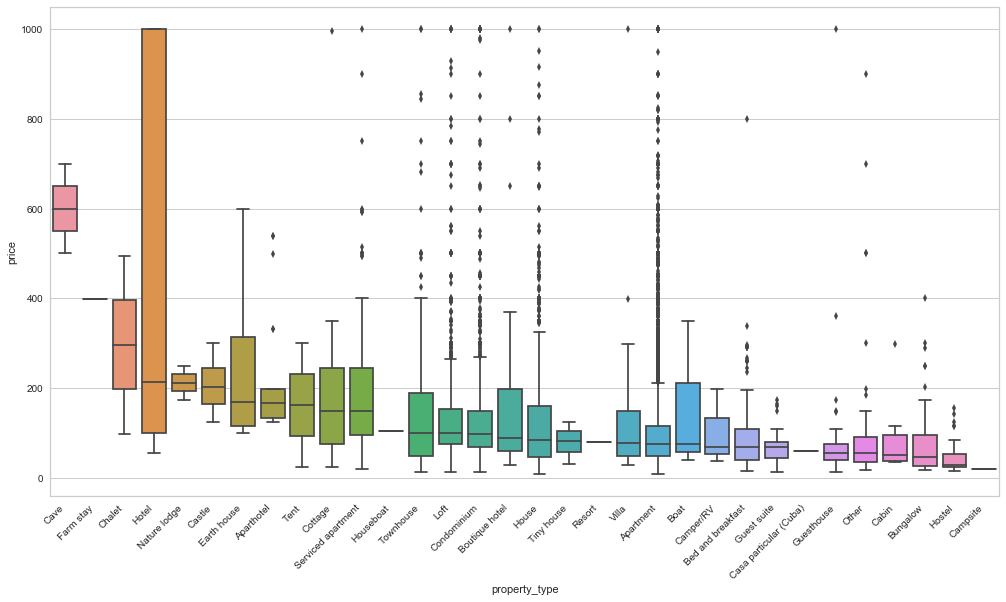

In [205]:
#4.5 Comparing the property_type vs price
sort_price = dataset.loc[(dataset.price <= 1000) & (dataset.price > 0)]\
                    .groupby('property_type')['price']\
                    .median()\
                    .sort_values(ascending=False)\
                    .index
sns.boxplot(y='price', x='property_type', data=dataset.loc[(dataset.price <= 1000) & (dataset.price > 0)], order=sort_price)
ax = plt.gca()
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
plt.show();

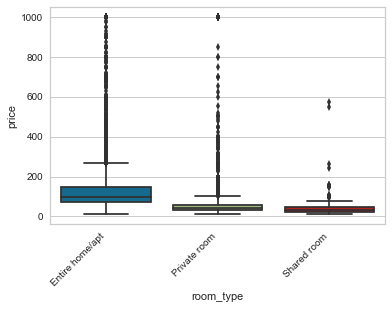

In [126]:
#4.6 Comparing the room_type vs price
sort_price = dataset.loc[(dataset.price <= 1000) & (dataset.price > 0)]\
                    .groupby('room_type')['price']\
                    .median()\
                    .sort_values(ascending=False)\
                    .index
sns.boxplot(y='price', x='room_type', data=dataset.loc[(dataset.price <= 1000) & (dataset.price > 0)], order=sort_price)
ax = plt.gca()
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
plt.show();


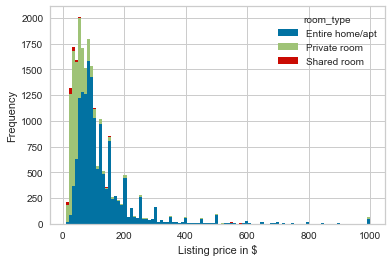

In [127]:
#4.6.1 Comparing the room_type vs price
dataset.loc[(dataset.price <= 1000) & (dataset.price > 0)].pivot(columns = 'room_type', values = 'price').plot.hist(stacked = True, bins=100)
plt.xlabel('Listing price in $');


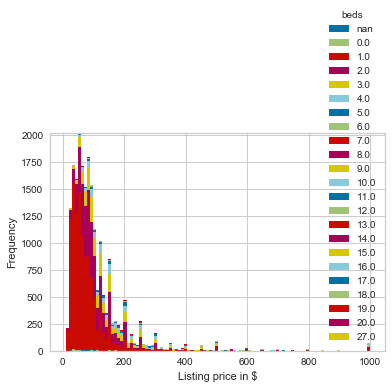

In [128]:
#4.7 Comparing the beds vs price
dataset.loc[(dataset.price <= 1000) & (dataset.price > 0)].pivot(columns = 'beds',values = 'price').plot.hist(stacked = True,bins=100)
plt.xlabel('Listing price in $');

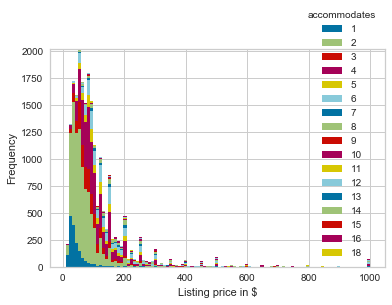

In [129]:
#4.8 Comparing the accommodates vs price
dataset.loc[(dataset.price <= 1000) & (dataset.price > 0)].pivot(columns = 'accommodates',values = 'price').plot.hist(stacked = True,bins=100)
plt.xlabel('Listing price in $');

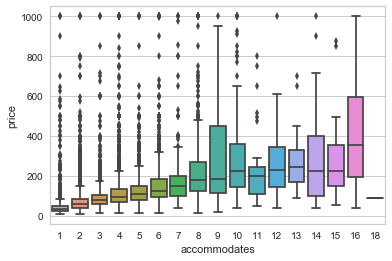

In [130]:
#4.8.1 Comparing the accommodates vs price
sns.boxplot(y='price', x='accommodates', data = dataset.loc[(dataset.price <= 1000) & (dataset.price > 0)])
plt.show();

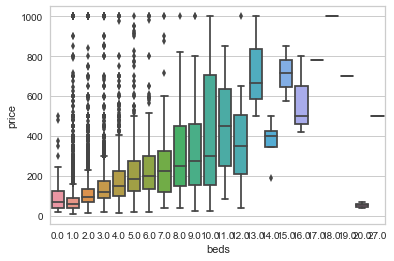

In [131]:
#4.9 Comparing the beds vs price
sns.boxplot(y='price', x='beds', data = dataset.loc[(dataset.price <= 1000) & (dataset.price > 0)])
plt.show();

C:\Users\Pravinaben\Anaconda3\lib\site-packages\numpy\lib\histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Users\Pravinaben\Anaconda3\lib\site-packages\numpy\lib\histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


Skewness: 26.659026
Kurtosis: 1787.731790


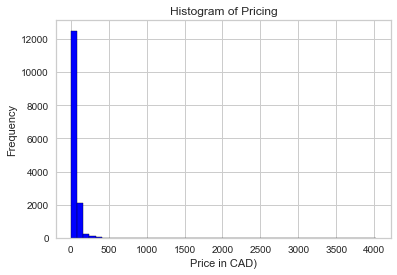

In [132]:
#5 Data Cleaning

#5.1 Data analysis and cleaning for Price variable

# histogram distribution of price
plt.hist(dataset['cleaning_fee'], color = 'blue', edgecolor = 'black',
         bins = int(50))

sns.distplot(dataset['cleaning_fee'], hist=True, kde=False, 
             bins=int(50), color = 'blue',
             hist_kws={'edgecolor':'black'})

plt.title('Histogram of Pricing')
plt.xlabel('Price in CAD)')
plt.ylabel('Frequency')

print("Skewness: %f" % dataset['cleaning_fee'].skew())
print("Kurtosis: %f" % dataset['cleaning_fee'].kurt())


Skewness: 6.079176
Kurtosis: 48.563155


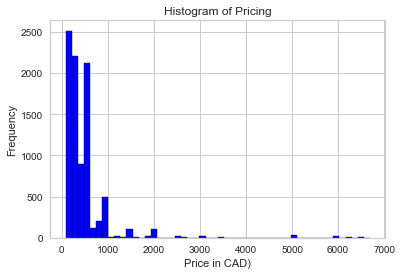

In [133]:
#5 Data Cleaning

#5.1 Data analysis and cleaning for Price variable

# histogram distribution of price
plt.hist(dataset['security_deposit'], color = 'blue', edgecolor = 'black',
         bins = int(50))

sns.distplot(dataset['security_deposit'], hist=True, kde=False, 
             bins=int(50), color = 'blue',
             hist_kws={'edgecolor':'black'})

plt.title('Histogram of Pricing')
plt.xlabel('Price in CAD)')
plt.ylabel('Frequency')

print("Skewness: %f" % dataset['security_deposit'].skew())
print("Kurtosis: %f" % dataset['security_deposit'].kurt())


In [134]:
dataset['security_deposit'].min()

80.0

In [109]:
dataset['cleaning_fee'].min()

6.0

Skewness: 22.556308
Kurtosis: 903.892000


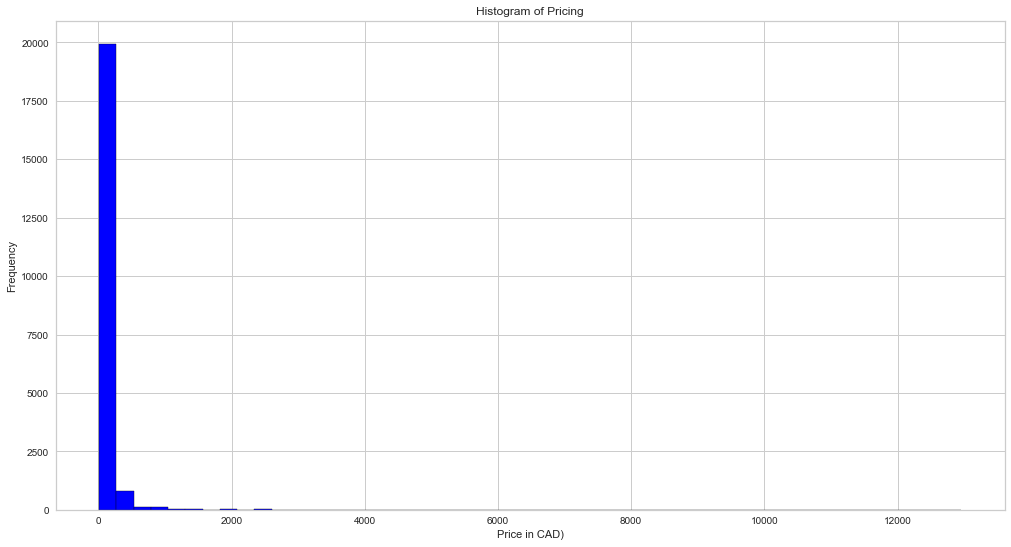

In [110]:
#5 Data Cleaning

#5.1 Data analysis and cleaning for Price variable

# histogram distribution of price
plt.hist(dataset['price'], color = 'blue', edgecolor = 'black',
         bins = int(50))

sns.distplot(dataset['price'], hist=True, kde=False, 
             bins=int(50), color = 'blue',
             hist_kws={'edgecolor':'black'})

plt.title('Histogram of Pricing')
plt.xlabel('Price in CAD)')
plt.ylabel('Frequency')

print("Skewness: %f" % dataset['price'].skew())
print("Kurtosis: %f" % dataset['price'].kurt())



C:\Users\Pravinaben\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:877: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
C:\Users\Pravinaben\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:877: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
C:\Users\Pravinaben\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:1831: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)


((array([-3.99138831, -3.77587696, -3.65797805, ...,  3.65797805,
          3.77587696,  3.99138831]),
  array([1.000e+01, 1.000e+01, 1.200e+01, ..., 1.296e+04,       nan,
               nan])),
 (nan, nan, nan))

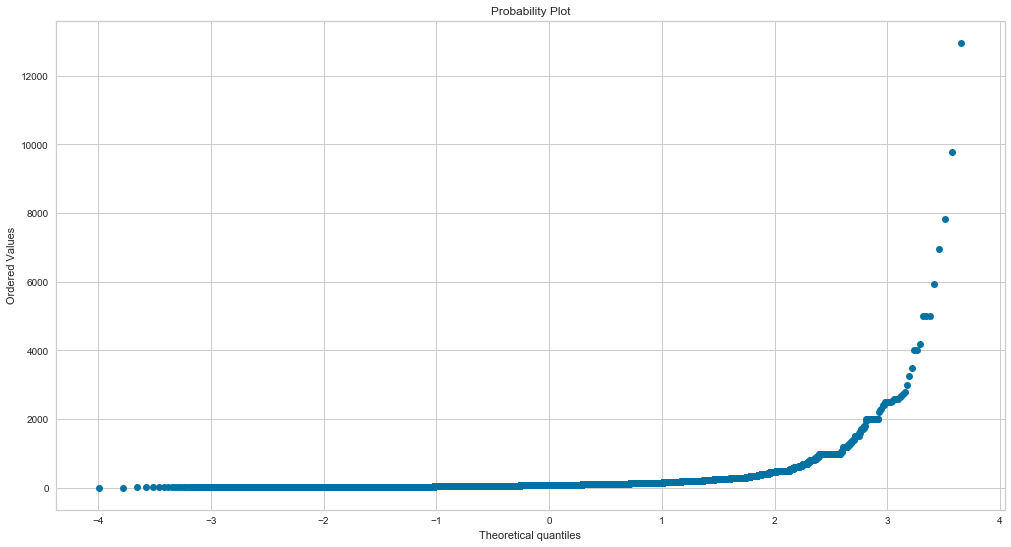

In [111]:
#Probability plot of price
stats.probplot(dataset['price'], plot=plt)

In [186]:
# Applying natural log to the 'price'
dataset['price_log'] = dataset['price'].apply(lambda x: math.log(x))

# Removing the price column since we have added the price_log column
dataset = dataset.drop('price', axis = 1)

In [187]:
dataset.price_log.head(60)

0     3.663562
1     3.401197
2     5.164786
3     4.543295
4     4.976734
5     3.401197
6     4.934474
7     4.787492
8     3.828641
9     4.605170
10    3.610918
11    4.007333
12    4.442651
13    4.605170
14    3.912023
15    5.703782
16    4.382027
17    5.293305
18    3.688879
19    3.555348
20    4.828314
21    4.828314
22    4.442651
23    4.828314
24    4.663439
25    4.744932
26    5.010635
27    3.295837
28    3.496508
29    4.595120
30    5.220356
31    3.555348
32    4.605170
33    5.043425
34    4.867534
35    3.610918
36    4.499810
37    4.094345
38    4.158883
39    4.077537
40    3.688879
41    4.532599
42    4.499810
43    3.555348
44    5.164786
45    4.382027
46    5.129899
47    4.382027
48    3.555348
49    3.401197
50    4.934474
51    4.867534
52    4.532599
53    4.488636
54    4.867534
55    5.564520
56    3.295837
57    4.605170
58    4.779123
59    4.382027
Name: price_log, dtype: float64

In [298]:
dataset.price_log.max()

9.469622969906265

In [188]:
# Applying natural log to the 'price'
dataset['cleaning_log'] = dataset['cleaning_fee'].apply(lambda x: math.log(x))

# Removing the price column since we have added the price_log column
dataset = dataset.drop('cleaning_fee', axis = 1)

In [189]:
# Applying natural log to the 'price'
dataset['security_log'] = dataset['security_deposit'].apply(lambda x: math.log(x))

# Removing the price column since we have added the price_log column
dataset = dataset.drop('security_deposit', axis = 1)

C:\Users\Pravinaben\Anaconda3\lib\site-packages\numpy\lib\histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Users\Pravinaben\Anaconda3\lib\site-packages\numpy\lib\histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


Skewness: -0.377509
Kurtosis: 0.017205


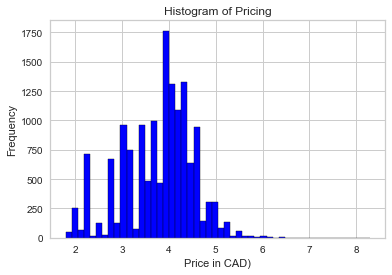

In [117]:
#5 Data Cleaning

#5.1 Data analysis and cleaning for Price variable

# histogram distribution of price
plt.hist(dataset['cleaning_log'], color = 'blue', edgecolor = 'black',
         bins = int(50))

sns.distplot(dataset['cleaning_log'], hist=True, kde=False, 
             bins=int(50), color = 'blue',
             hist_kws={'edgecolor':'black'})

plt.title('Histogram of Pricing')
plt.xlabel('Price in CAD)')
plt.ylabel('Frequency')

print("Skewness: %f" % dataset['cleaning_log'].skew())
print("Kurtosis: %f" % dataset['cleaning_log'].kurt())


Skewness: 1.529939
Kurtosis: 8.103959


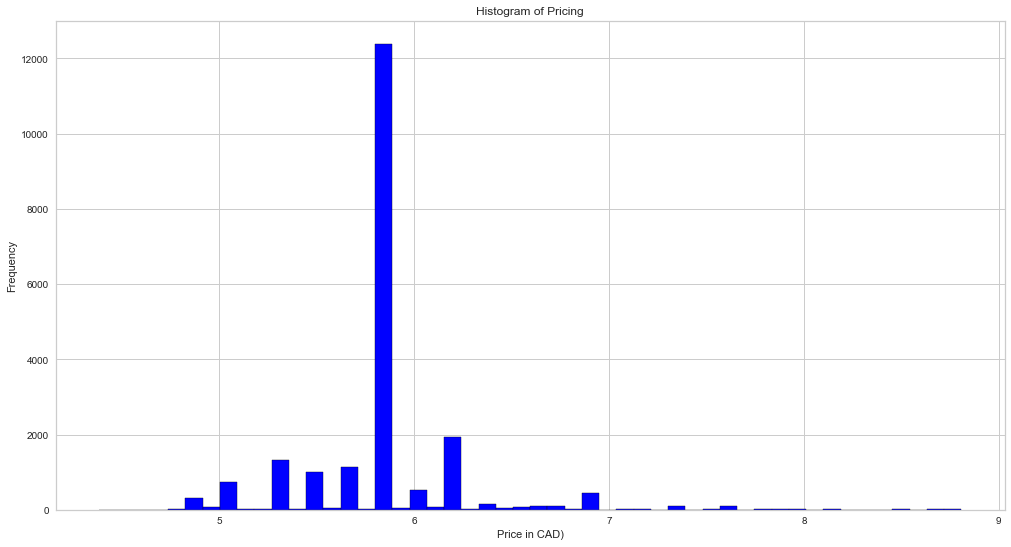

In [255]:
#5 Data Cleaning

#5.1 Data analysis and cleaning for Price variable

# histogram distribution of price
plt.hist(dataset['security_log'], color = 'blue', edgecolor = 'black',
         bins = int(50))

sns.distplot(dataset['security_log'], hist=True, kde=False, 
             bins=int(50), color = 'blue',
             hist_kws={'edgecolor':'black'})

plt.title('Histogram of Pricing')
plt.xlabel('Price in CAD)')
plt.ylabel('Frequency')

print("Skewness: %f" % dataset['security_log'].skew())
print("Kurtosis: %f" % dataset['security_log'].kurt())


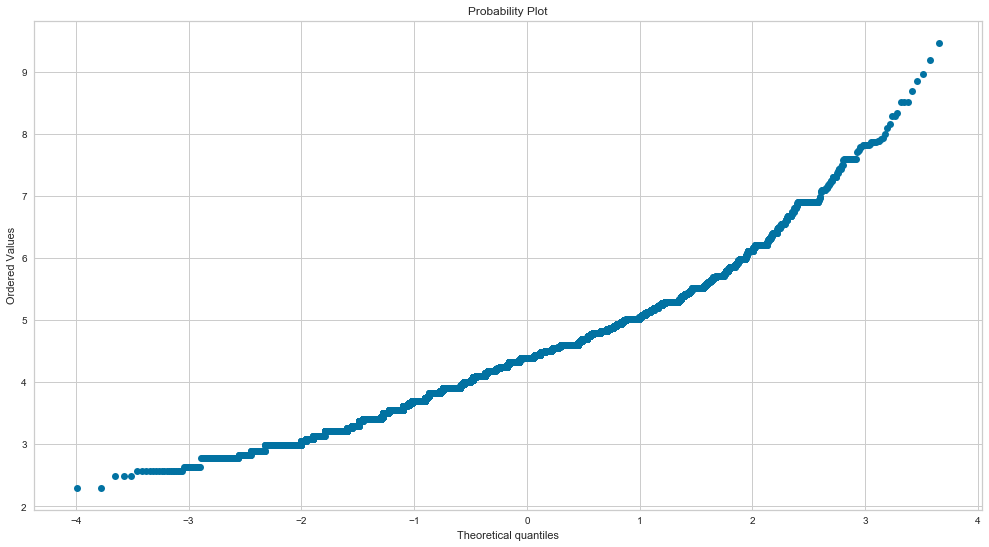

In [148]:
# Checking the distribution for price_log
stats.probplot(dataset['price_log'], dist="norm", plot=pylab)
pylab.show()

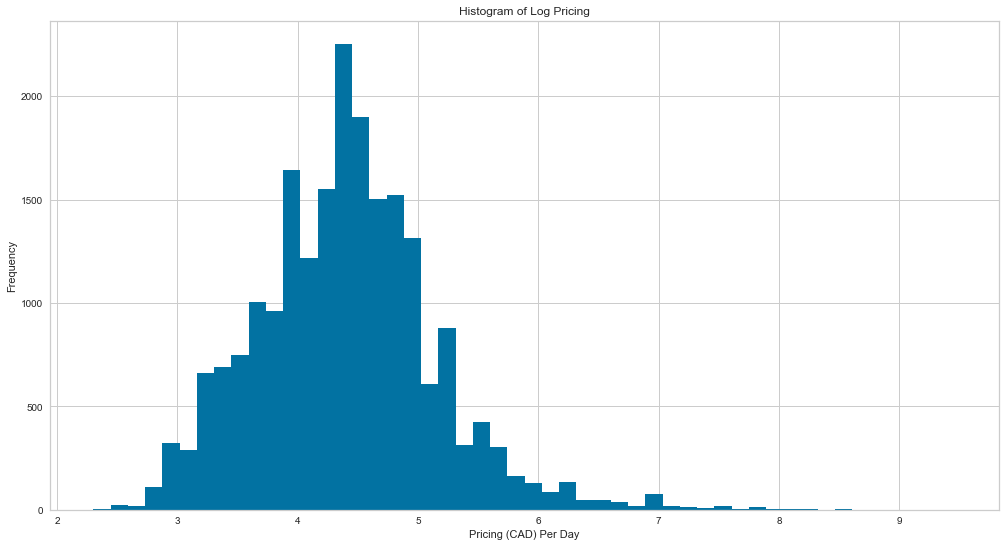

Skewness: 0.652819
Kurtosis: 1.683841


In [149]:
#visualize distribution of price_log (target variable)
plt.hist(dataset['price_log'], bins=50)
plt.title("Histogram of Log Pricing")
plt.xlabel("Pricing (CAD) Per Day")
plt.ylabel("Frequency")
plt.show()

print("Skewness: %f" % dataset['price_log'].skew())
print("Kurtosis: %f" % dataset['price_log'].kurt())

In [190]:
#5.2 Checking for null values

dataset.isnull().sum()

id                            0
host_is_superhost             8
neighbourhood_cleansed        0
property_type                 0
room_type                     0
accommodates                  0
bathrooms                    30
bedrooms                      4
beds                         27
guests_included               0
availability_365              0
number_of_reviews             0
review_scores_rating       4725
cancellation_policy           1
reviews_per_month          4322
price_log                     2
cleaning_log               6170
security_log              12141
dtype: int64

In [191]:
#5.3 Dropping the values of bathrooms bedrooms and beds since there are very few missing values
dataset = dataset.dropna(how='any', subset=['bedrooms','bathrooms','beds','price_log', 'host_is_superhost','cleaning_log', 'cancellation_policy'])

In [192]:
#5.4 Replacing review score rating missing values with mean
dataset['review_scores_rating'].fillna((dataset['review_scores_rating'].mean()), inplace=True)
dataset['security_log'].fillna((dataset['security_log'].mean()), inplace=True)
dataset['reviews_per_month'].fillna((dataset['reviews_per_month'].mean()), inplace=True)



In [193]:
#5.5 Rechecking for null values
dataset.isnull().sum()

id                        0
host_is_superhost         0
neighbourhood_cleansed    0
property_type             0
room_type                 0
accommodates              0
bathrooms                 0
bedrooms                  0
beds                      0
guests_included           0
availability_365          0
number_of_reviews         0
review_scores_rating      0
cancellation_policy       0
reviews_per_month         0
price_log                 0
cleaning_log              0
security_log              0
dtype: int64

In [164]:
dataset.shape

(14912, 20)

In [194]:
#5.6 Encoding the categorical variables
encoding = dataset.copy()
encoding = pd.get_dummies(encoding, columns=['room_type','host_is_superhost', 'neighbourhood_cleansed', 'property_type', 'cancellation_policy'])

print(encoding.head())
print ('Number of Columns:', len(encoding.columns))

# move target predictor 'price' to the end of the dataframe
cols = list(encoding.columns.values)
idx = cols.index('price_log')
rearrange_cols = cols[:idx] + cols[idx+1:] + [cols[idx]]
dataset = encoding[rearrange_cols]

      id  accommodates  bathrooms  bedrooms  beds  guests_included  \
1   2843             2        1.0       1.0   1.0                1   
3  29059             4        1.0       1.0   2.0                2   
4  29061             5        1.0       2.0   3.0                2   
5  31847             2        1.0       1.0   1.0                1   
7  36301             2        1.0       1.0   1.0                1   

   availability_365  number_of_reviews  review_scores_rating  \
1               232                125                  88.0   
3               292                293                  93.0   
4               334                 49                  92.0   
5               244                131                  89.0   
7               239                 34                  99.0   

   reviews_per_month  ...  property_type_Tent  property_type_Tiny house  \
1               1.02  ...                   0                         0   
3               2.65  ...                   

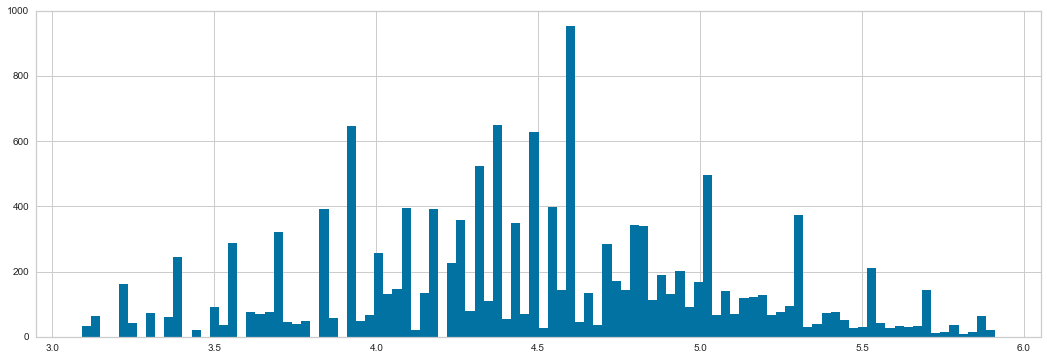

(14201, 1)

In [129]:
#5.7 Fixing outliers
# Outlier : we define outlier as values which are two standard deviations away from the mean.
# Using Z-Score method

def reject_outliers(price_log):
    m = np.median(dataset['price_log'])
    sd = np.std(dataset['price_log'])
    filtered= [a for a in (dataset['price_log']) if (m - 2 * sd < a < m + 2 * sd)]
    return filtered

figure_size = plt.rcParams["figure.figsize"]
figure_size[0] =18.0
figure_size[1] = 6.0

filtered = reject_outliers('price_log')
plt.hist(filtered, 100)
figure_size[0]=17.0
figure_size[1]=9.0
plt.show()

data_price_log = pd.DataFrame(filtered)
data_price_log.shape

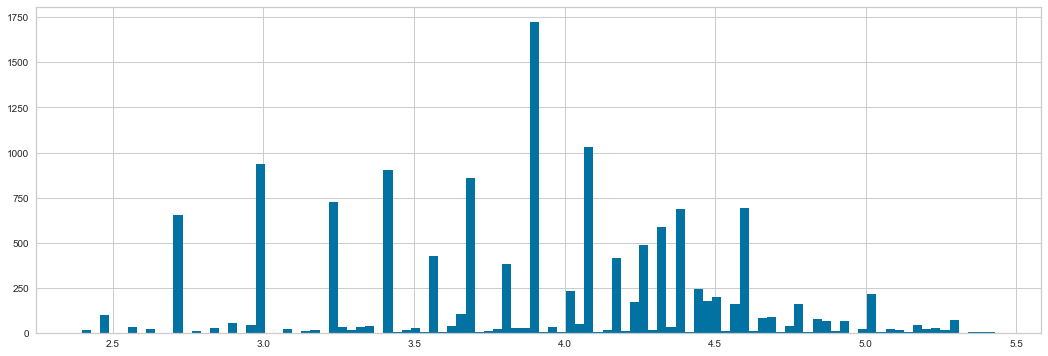

(13694, 1)

In [130]:
#5.7 Fixing outliers
# Outlier : we define outlier as values which are two standard deviations away from the mean.
# Using Z-Score method

def reject_outliers(price_log):
    m = np.median(dataset['cleaning_log'])
    sd = np.std(dataset['cleaning_log'])
    filtered= [a for a in (dataset['cleaning_log']) if (m - 2 * sd < a < m + 2 * sd)]
    return filtered

figure_size = plt.rcParams["figure.figsize"]
figure_size[0] =18.0
figure_size[1] = 6.0

filtered = reject_outliers('cleaning_log')
plt.hist(filtered, 100)
figure_size[0]=17.0
figure_size[1]=9.0
plt.show()

data_price_log = pd.DataFrame(filtered)
data_price_log.shape

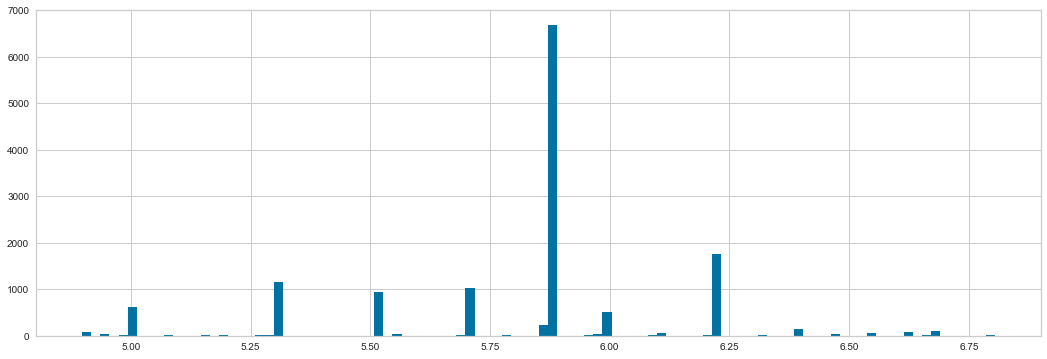

(13923, 1)

In [131]:
#5.7 Fixing outliers
# Outlier : we define outlier as values which are two standard deviations away from the mean.
# Using Z-Score method

def reject_outliers(price_log):
    m = np.median(dataset['security_log'])
    sd = np.std(dataset['security_log'])
    filtered= [a for a in (dataset['security_log']) if (m - 2 * sd < a < m + 2 * sd)]
    return filtered

figure_size = plt.rcParams["figure.figsize"]
figure_size[0] =18.0
figure_size[1] = 6.0

filtered = reject_outliers('security_log')
plt.hist(filtered, 100)
figure_size[0]=17.0
figure_size[1]=9.0
plt.show()

data_price_log = pd.DataFrame(filtered)
data_price_log.shape

In [132]:
dataset.shape

(14912, 85)

In [133]:
#distribution of price_log variable
dataset['price_log'].describe()

count    14912.000000
mean         4.516069
std          0.706130
min          2.302585
25%          4.077537
50%          4.499810
75%          4.919981
max          9.469623
Name: price_log, dtype: float64

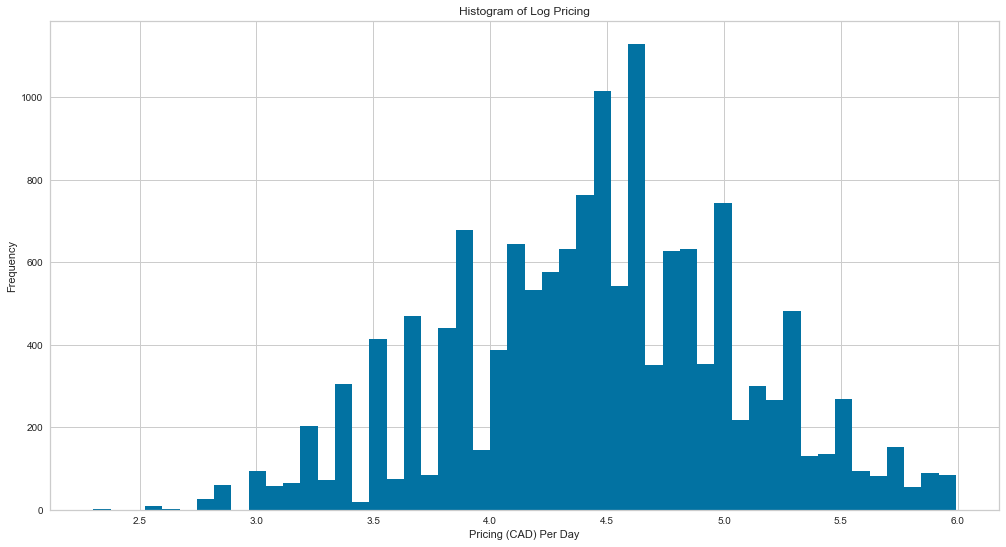

(14504, 85)

In [134]:
#5.8 Removing Outliers

#Outlier for price_log column would be : mean + 2 * sd = 4.4 + (2 x 0.7) = 6 above

newdataset = dataset[dataset['price_log']<6]

plt.hist(newdataset['price_log'], bins=50)
plt.title("Histogram of Log Pricing")
plt.xlabel("Pricing (CAD) Per Day")
plt.ylabel("Frequency")
plt.show()

newdataset.shape

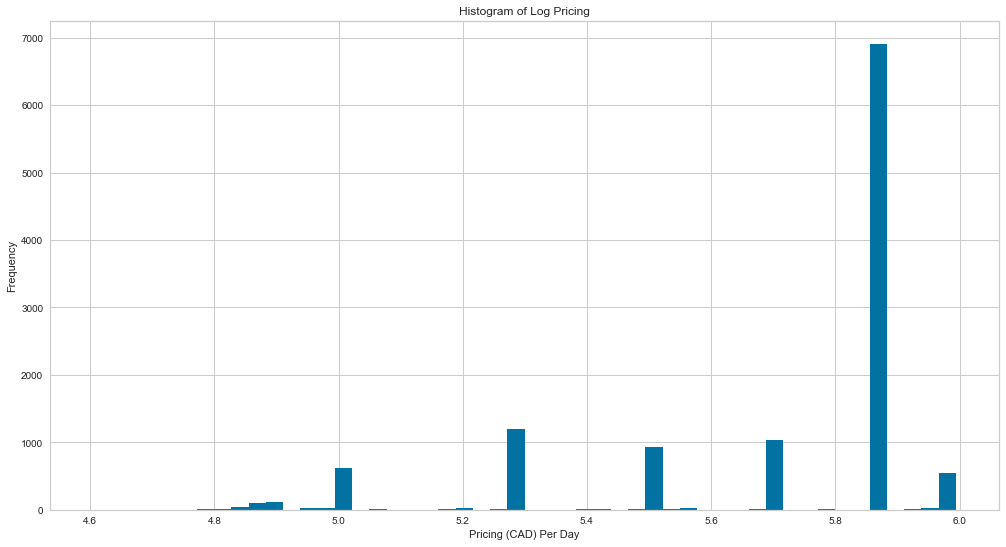

(11760, 85)

In [135]:
#5.8 Removing Outliers

#Outlier for price_log column would be : mean + 2 * sd = 4.4 + (2 x 0.7) = 6 above

newdataset = dataset[dataset['security_log']<6]

plt.hist(newdataset['security_log'], bins=50)
plt.title("Histogram of Log Pricing")
plt.xlabel("Pricing (CAD) Per Day")
plt.ylabel("Frequency")
plt.show()

newdataset.shape

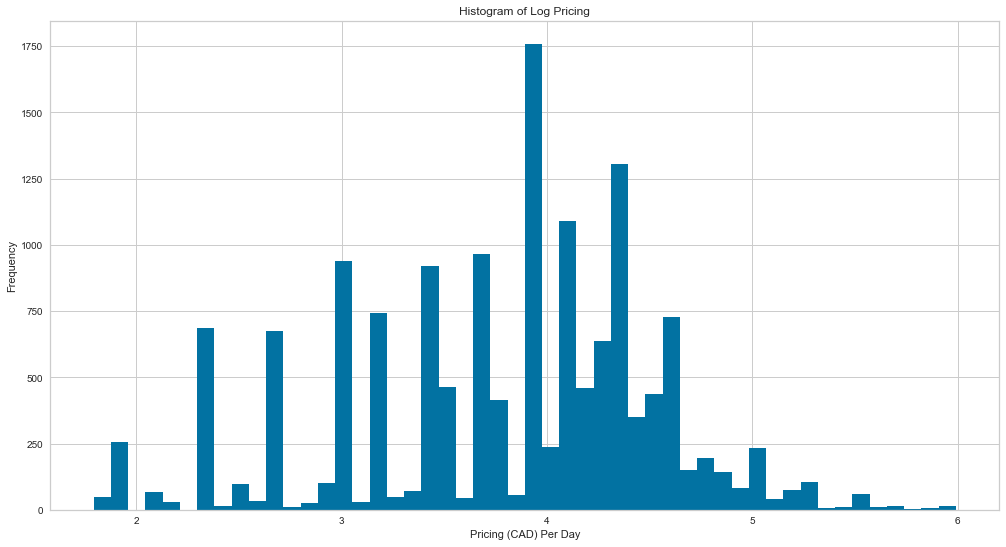

(14894, 85)

In [136]:
#5.8 Removing Outliers

#Outlier for price_log column would be : mean + 2 * sd = 4.4 + (2 x 0.7) = 6 above

newdataset = dataset[dataset['cleaning_log']<6]

plt.hist(newdataset['cleaning_log'], bins=50)
plt.title("Histogram of Log Pricing")
plt.xlabel("Pricing (CAD) Per Day")
plt.ylabel("Frequency")
plt.show()

newdataset.shape

In [195]:
#5.9 Correlation of variables with target variable:

corr_mat = dataset.corr()
corr_mat['price_log'].sort_values(ascending=False)

price_log                                                          1.000000
cleaning_log                                                       0.613102
accommodates                                                       0.575621
room_type_Entire home/apt                                          0.507132
beds                                                               0.500760
bedrooms                                                           0.474382
guests_included                                                    0.429111
bathrooms                                                          0.311414
security_log                                                       0.252149
cancellation_policy_strict_14_with_grace_period                    0.198942
availability_365                                                   0.159951
neighbourhood_cleansed_Ville-Marie                                 0.150238
property_type_Loft                                                 0.108204
property_typ

In [309]:
dataset.drop('amenities', axis = 1)

,id,accommodates,bathrooms,bedrooms,beds,guests_included,availability_365,number_of_reviews,review_scores_rating,cleaning_log,...,property_type_Villa,instant_bookable_f,instant_bookable_t,cancellation_policy_flexible,cancellation_policy_moderate,cancellation_policy_strict,cancellation_policy_strict_14_with_grace_period,cancellation_policy_super_strict_30,cancellation_policy_super_strict_60,price_log
1,2843,2,1.0,1.0,1.0,1,232,125,88.000000,2.995732,...,0,0,1,0,1,0,0,0,0,3.401197
3,29059,4,1.0,1.0,2.0,2,292,293,93.000000,4.174387,...,0,1,0,0,1,0,0,0,0,4.543295
4,29061,5,1.0,2.0,3.0,2,334,49,92.000000,4.605170,...,0,0,1,0,1,0,0,0,0,4.976734
5,31847,2,1.0,1.0,1.0,1,244,131,89.000000,2.995732,...,0,0,1,0,1,0,0,0,0,3.401197
7,36301,2,1.0,1.0,1.0,1,239,34,99.000000,4.094345,...,0,1,0,0,0,0,1,0,0,4.787492
8,38118,1,1.0,3.0,1.0,1,333,12,87.000000,2.708050,...,0,1,0,1,0,0,0,0,0,3.828641
9,41819,4,1.0,2.0,3.0,4,259,351,93.000000,3.688879,...,0,0,1,0,1,0,0,0,0,4.605170
14,52932,4,1.0,2.0,2.0,4,142,165,86.000000,3.401197,...,0,0,1,0,1,0,0,0,0,3.912023
15,53428,6,3.0,3.0,3.0,2,301,37,97.000000,4.382027,...,0,1,0,0,0,0,1,0,0,5.703782
16,53471,2,1.0,1.0,1.0,2,58,52,97.000000,2.995732,...,0,1,0,1,0,0,0,0,0,4.382027


In [167]:
newdataset.drop('id', axis = 1)

,host_listings_count,accommodates,bathrooms,bedrooms,beds,guests_included,availability_365,number_of_reviews,review_scores_rating,reviews_per_month,...,property_type_Villa,instant_bookable_f,instant_bookable_t,cancellation_policy_flexible,cancellation_policy_moderate,cancellation_policy_strict,cancellation_policy_strict_14_with_grace_period,cancellation_policy_super_strict_30,cancellation_policy_super_strict_60,price_log
1,6.0,2,1.0,1.0,1.0,1,232,125,88.000000,1.020000,...,0,0,1,0,1,0,0,0,0,3.401197
3,3.0,4,1.0,1.0,2.0,2,292,293,93.000000,2.650000,...,0,1,0,0,1,0,0,0,0,4.543295
4,3.0,5,1.0,2.0,3.0,2,334,49,92.000000,0.540000,...,0,0,1,0,1,0,0,0,0,4.976734
5,6.0,2,1.0,1.0,1.0,1,244,131,89.000000,1.190000,...,0,0,1,0,1,0,0,0,0,3.401197
7,7.0,2,1.0,1.0,1.0,1,239,34,99.000000,0.680000,...,0,1,0,0,0,0,1,0,0,4.787492
8,3.0,1,1.0,3.0,1.0,1,333,12,87.000000,0.120000,...,0,1,0,1,0,0,0,0,0,3.828641
9,6.0,4,1.0,2.0,3.0,4,259,351,93.000000,3.230000,...,0,0,1,0,1,0,0,0,0,4.605170
14,6.0,4,1.0,2.0,2.0,4,142,165,86.000000,1.670000,...,0,0,1,0,1,0,0,0,0,3.912023
15,1.0,6,3.0,3.0,3.0,2,301,37,97.000000,0.380000,...,0,1,0,0,0,0,1,0,0,5.703782
16,1.0,2,1.0,1.0,1.0,2,58,52,97.000000,0.490000,...,0,1,0,1,0,0,0,0,0,4.382027


In [24]:
newdataset = dataset

In [196]:
#6 Modelling 
#Training and Testing data

X = newdataset.iloc[: , 1:-1].values
y = newdataset.iloc[: , -1].values

In [197]:
y

array([3.40119738, 4.54329478, 4.97673374, ..., 4.44265126, 4.44265126,
       4.24849524])

In [141]:
X.head(2)

AttributeError: 'numpy.ndarray' object has no attribute 'head'

In [198]:
#30 percent of the data is allocated for testing
# random state is set not to introduce sampling bias

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [199]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)


(10425, 83)
(10425,)
(4469, 83)
(4469,)


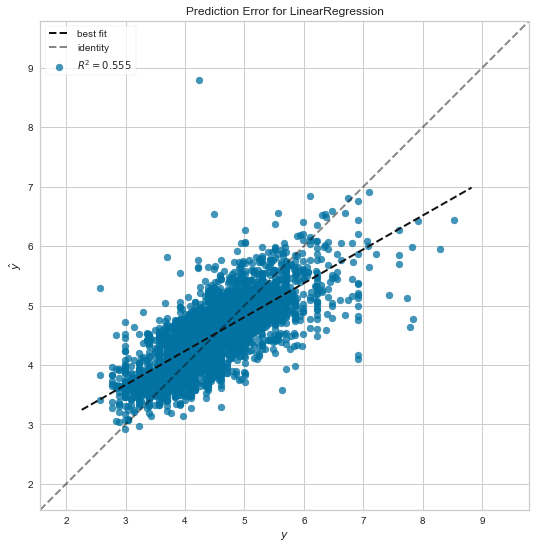

In [204]:
#6.1 Linear Regression

# Instantiate the linear model and visualizer

lm = LinearRegression()
visualizer = PredictionError(lm)

# Fit the training data to the visualizer
visualizer.fit(X_train, y_train)
# Evaluate the model on the test data
visualizer.score(X_test, y_test) 
visualizer.poof() 

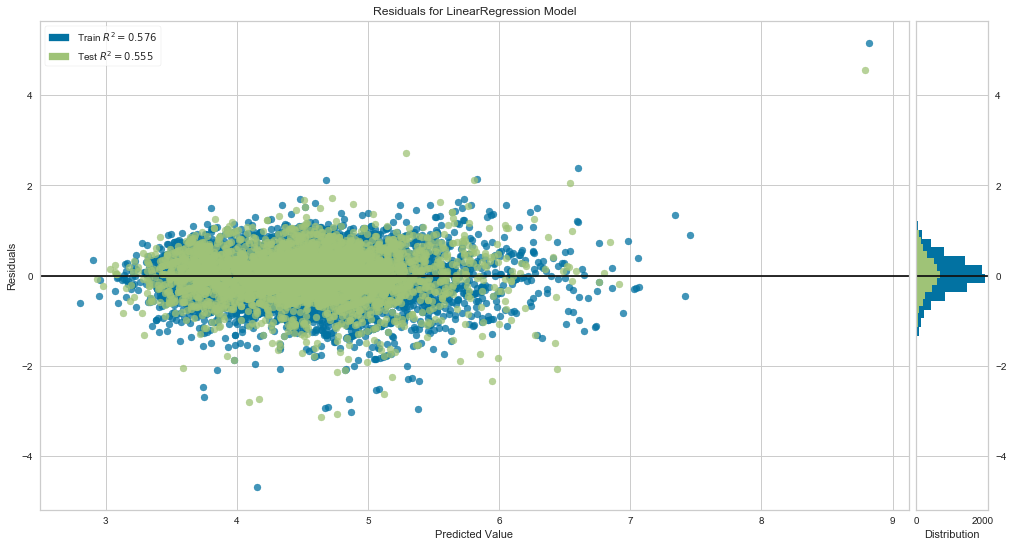

In [205]:
# Instantiate visualizer
visualizer = ResidualsPlot(lm)

# Fit the training data to the model
visualizer.fit(X_train, y_train)

# Evaluate the model on the test data
visualizer.score(X_test, y_test)  
visualizer.poof() 

In [206]:
#Evaluating the Model
from sklearn import metrics
lm = LinearRegression()

#Train/fit lm on the training data
lm.fit(X_train,y_train)
lm.score(X_test,y_test)
predictions = lm.predict( X_test)
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))
print('Coefficient of Determination:',metrics.r2_score(y_test, predictions))
print(lm.score(X_test, y_test))
a1 = y_test.ravel()
b1 = predictions.ravel()  
dataf = pd.DataFrame({'Actual': a1, 'Predicted': b1})   
print(dataf.head(20)) 
dataf = dataf.cumsum();

MAE: 0.3447155041031951
MSE: 0.22143522395514387
RMSE: 0.47056904270802163
Coefficient of Determination: 0.5553177913295277
0.5553177913295277
      Actual  Predicted
0   4.859812   5.153823
1   4.382027   4.516136
2   3.688879   3.406898
3   4.934474   4.509992
4   4.442651   4.334787
5   4.499810   4.288132
6   4.867534   4.328111
7   4.663439   4.695849
8   5.010635   4.514349
9   3.912023   4.549983
10  4.779123   4.870711
11  4.488636   4.424268
12  4.234107   4.440353
13  4.442651   4.366701
14  4.094345   4.050517
15  4.976734   4.752646
16  4.787492   4.719056
17  4.499810   4.548656
18  4.867534   5.390825
19  3.828641   3.793309


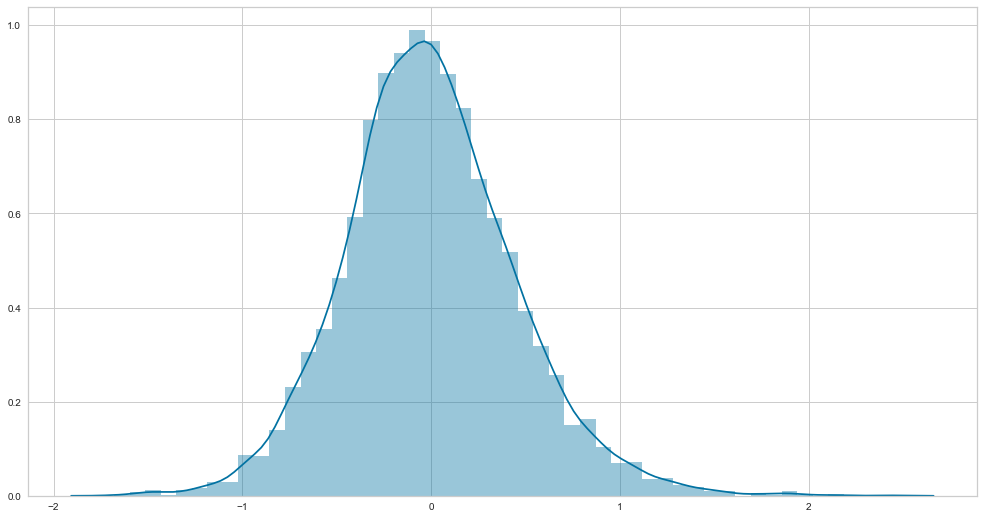

In [107]:
#Plotting Residuals
sns.distplot((y_test-predictions),bins=50);

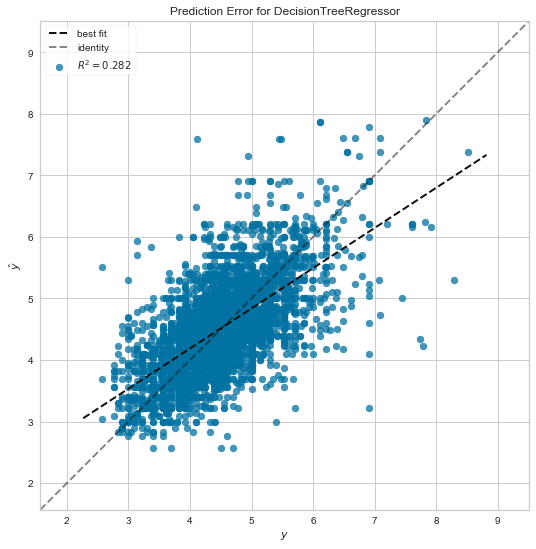

In [207]:
#6.2 DecisionTree Regressor

# Instantiate the decision tree regressor model and visualizer
dt = DecisionTreeRegressor(random_state=0)
visualizer = PredictionError(dt)

# Fit the training data to the visualizer
visualizer.fit(X_train, y_train)

# Evaluate the model on the test data
visualizer.score(X_test, y_test)  
g = visualizer.poof() 

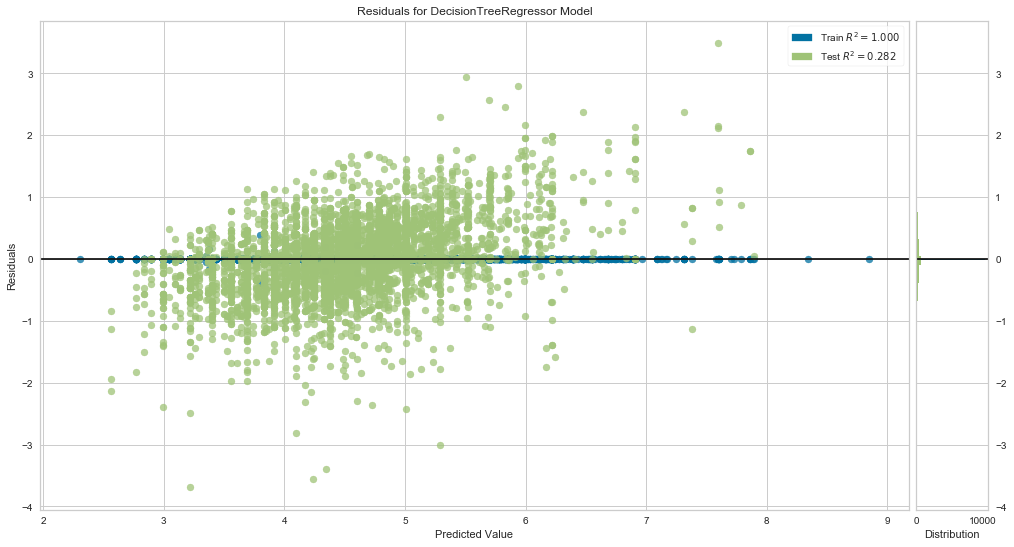

In [208]:
# Instantiate the visualizer
visualizer = ResidualsPlot(dt)

# Fit the training data to the model
visualizer.fit(X_train, y_train)

# Evaluate the model on the test data
visualizer.score(X_test, y_test)  
visualizer.poof()           

In [209]:
#Evaluating the Decision Tree Regressor Model
dt_reg = DecisionTreeRegressor(random_state=0)
dt_reg.fit(X_train,y_train)
dt_reg.score(X_test,y_test)
dtr_pred= dt_reg.predict(X_test)

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, dtr_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, dtr_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test,dtr_pred))) 
print('Coefficient of Determination:',metrics.r2_score(y_test, dtr_pred))

a1 = y_test.ravel()
b1 = dtr_pred.ravel()  
dataf = pd.DataFrame({'Actual': a1, 'Predicted': b1})   
print(dataf.head(20)) 
dataf = dataf.cumsum();


Mean Absolute Error: 0.43564331008562657
Mean Squared Error: 0.35773478700869155
Root Mean Squared Error: 0.598109343689506
Coefficient of Determination: 0.28160347588823353
      Actual  Predicted
0   4.859812   4.867534
1   4.382027   4.110874
2   3.688879   3.555348
3   4.934474   5.278115
4   4.442651   3.526361
5   4.499810   4.442651
6   4.867534   4.605170
7   4.663439   5.293305
8   5.010635   4.077537
9   3.912023   3.912023
10  4.779123   4.779123
11  4.488636   5.010635
12  4.234107   4.382027
13  4.442651   4.394449
14  4.094345   4.174387
15  4.976734   5.068904
16  4.787492   4.700480
17  4.499810   5.062595
18  4.867534   4.488636
19  3.828641   4.553877


In [113]:
# Calculate mean absolute percentage error (MAPE)
errors = abs(dtr_pred - y_test)
mape = 100 * (errors / y_test)
# Calculate and display accuracy
accuracy = 100 - np.mean(mape)
print('Accuracy:', round(accuracy, 2), '%.')

Accuracy: 89.57 %.


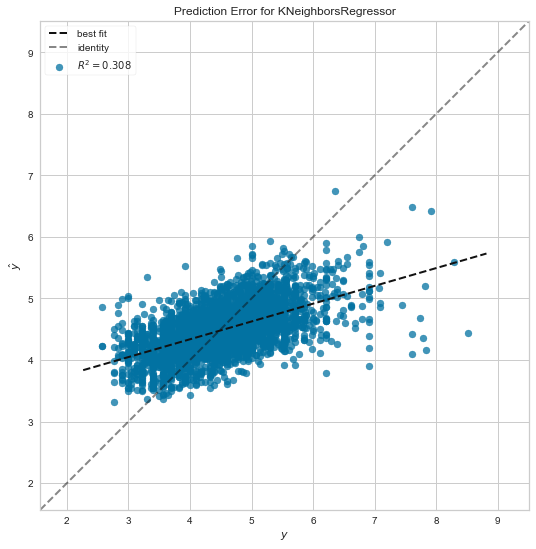

In [210]:
#6.3 KNN Regressor

# Instantiate the knn regressor model and visualizer
kn = KNeighborsRegressor(n_neighbors=10)
visualizer = PredictionError(kn)

# Fit the training data to the visualizer
visualizer.fit(X_train, y_train)

# Evaluate the model on the test data
visualizer.score(X_test, y_test)  
g = visualizer.poof() 

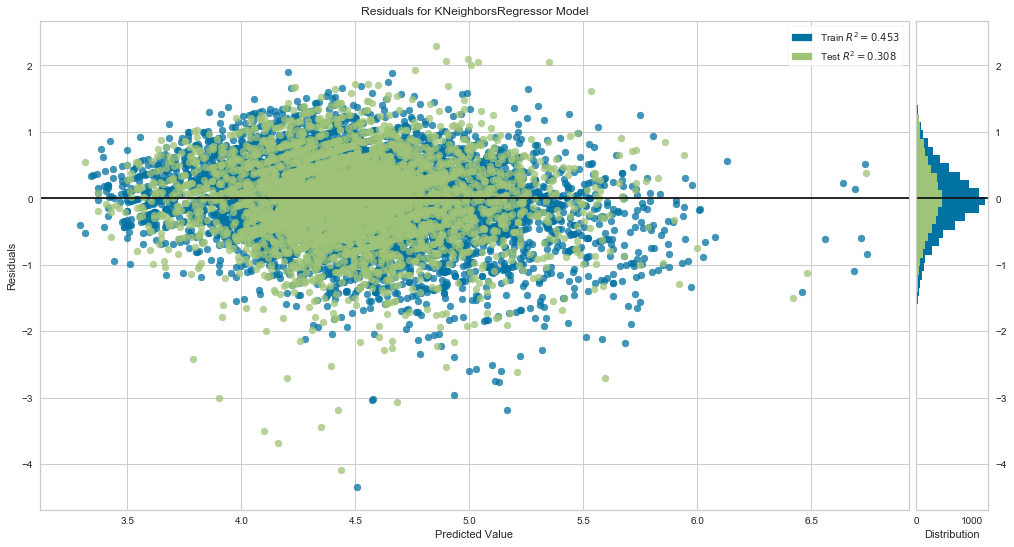

In [211]:
# Instantiate the visualizer
visualizer = ResidualsPlot(kn)

# Fit the training data to the model
visualizer.fit(X_train, y_train)

# Evaluate the model on the test data
visualizer.score(X_test, y_test)  
visualizer.poof()           

In [212]:
#Evaluating the KNN Regressor Model

knn = KNeighborsRegressor(n_neighbors=10)
knn.fit(X_train,y_train)
knn_pred= knn.predict(X_test)
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, knn_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, knn_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, knn_pred))) 
print ('Coefficient of Determination:',metrics.r2_score(y_test, knn_pred))

a1 = y_test.ravel()
b1 = knn_pred.ravel()  
dataf = pd.DataFrame({'Actual': a1, 'Predicted': b1})   
print(dataf.head(20)) 
dataf = dataf.cumsum();

Mean Absolute Error: 0.4388522563403552
Mean Squared Error: 0.3443976556743703
Root Mean Squared Error: 0.5868540326813562
Coefficient of Determination: 0.30838686162579587
      Actual  Predicted
0   4.859812   4.848434
1   4.382027   4.235531
2   3.688879   4.361110
3   4.934474   4.469503
4   4.442651   4.264746
5   4.499810   4.580609
6   4.867534   4.310582
7   4.663439   4.377164
8   5.010635   4.478100
9   3.912023   4.615768
10  4.779123   4.210371
11  4.488636   4.789513
12  4.234107   4.596132
13  4.442651   4.547790
14  4.094345   4.354939
15  4.976734   4.143758
16  4.787492   4.255363
17  4.499810   4.851515
18  4.867534   4.764564
19  3.828641   4.816644


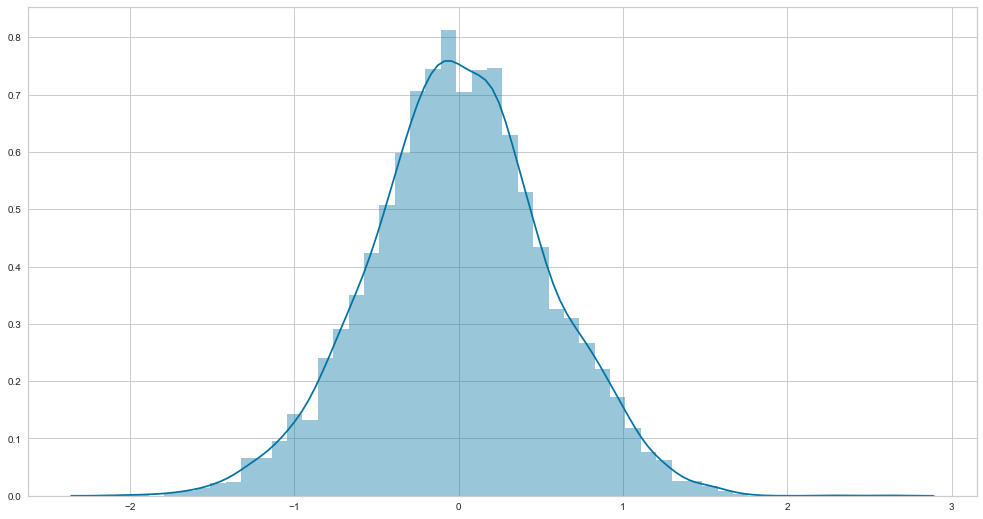

In [69]:
#Plotting Residuals
sns.distplot((y_test-knn_pred),bins=50);

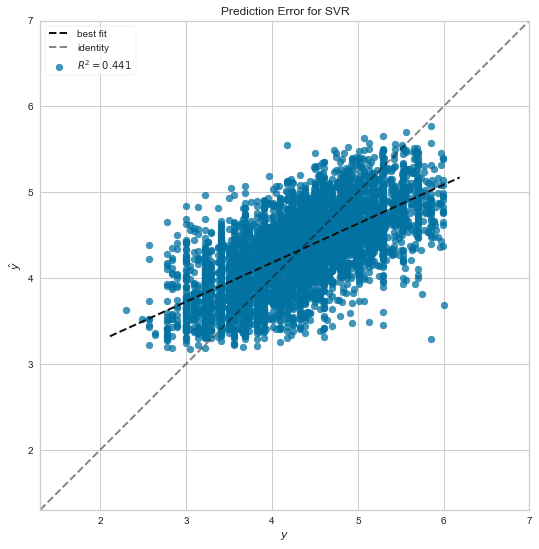

In [119]:
#6.4 SVM Regression

# Instantiate the svr model and visualizer
svr = SVR(gamma='auto')
visualizer = PredictionError(svr)

# Fit the training data to the visualizer
visualizer.fit(X_train, y_train)

# Evaluate the model on the test data
visualizer.score(X_test, y_test)  
g = visualizer.poof()            

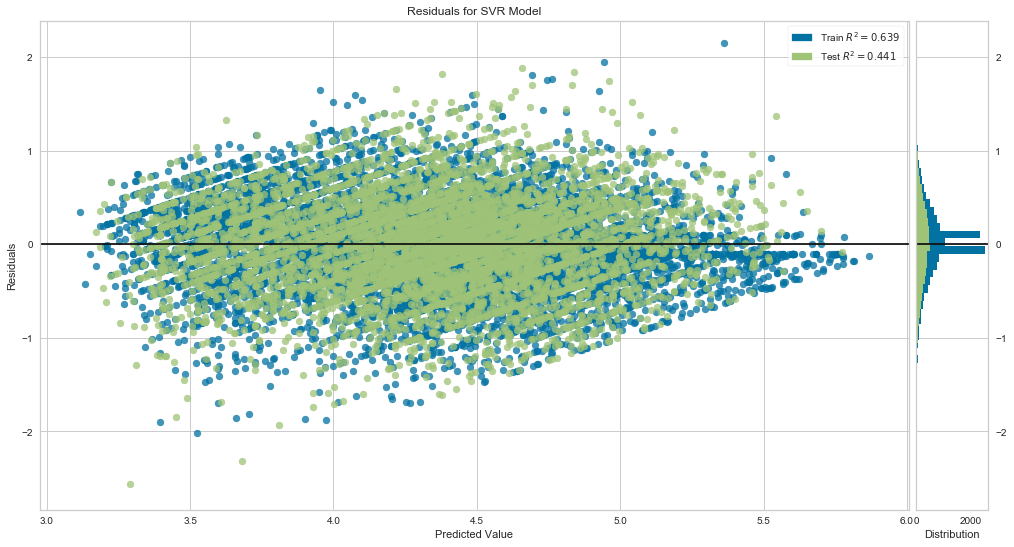

In [120]:
# Instantiate the visualizer
visualizer = ResidualsPlot(svr)

# Fit the training data to the model
visualizer.fit(X_train, y_train)

# Evaluate the model on the test data
visualizer.score(X_test, y_test)  
visualizer.poof() 

In [39]:
#Evaluate the SVM Regressor
svr_reg = SVR(gamma='auto')
svr_reg.fit(X_train, y_train)
svr_pred= svr_reg.predict(X_test)

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, svr_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, svr_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, svr_pred)))
print ('Coefficient of Determination:',metrics.r2_score(y_test, svr_pred))

a1 = y_test.ravel()
b1 = svr_pred.ravel()  
dataf = pd.DataFrame({'Actual': a1, 'Predicted': b1})   
print(dataf.head(20)) 
dataf = dataf.cumsum();

Mean Absolute Error: 0.3931043114662862
Mean Squared Error: 0.2795942964232591
Root Mean Squared Error: 0.5287667694014622
Coefficient of Determination: 0.43908553459388466
      Actual  Predicted
0   5.192957   5.140413
1   4.532599   4.502995
2   4.787492   4.023779
3   4.442651   4.287596
4   5.209486   5.027043
5   5.010635   4.207116
6   4.867534   4.545252
7   3.850148   3.776061
8   5.991465   4.489993
9   3.912023   3.699489
10  4.330733   4.085541
11  5.293305   4.413769
12  3.688879   4.476933
13  4.828314   4.675624
14  3.828641   4.213024
15  4.605170   4.326653
16  6.683361   5.356321
17  4.382027   4.105346
18  3.688879   4.109734
19  4.174387   4.255670


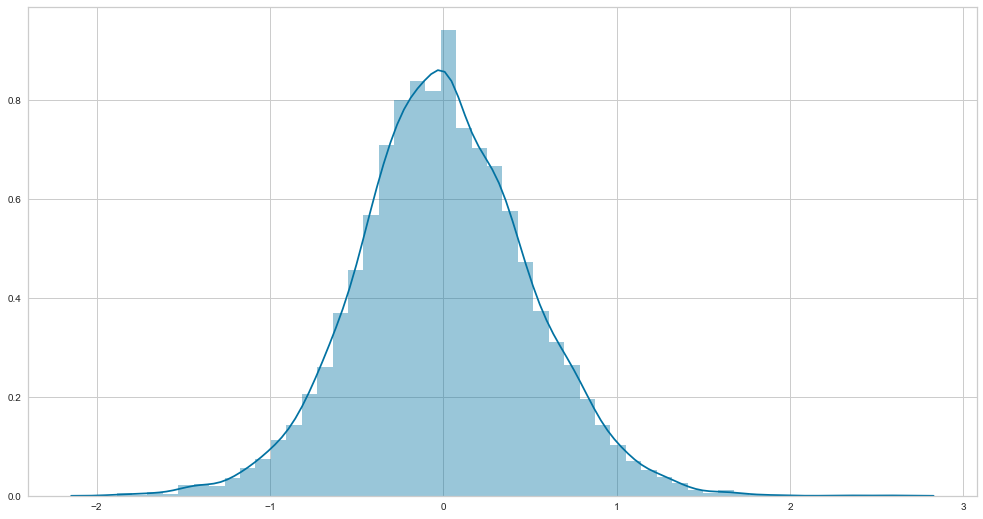

In [76]:
#Plotting Residuals
plt.sca
sns.distplot((y_test-svr_pred),bins=50);

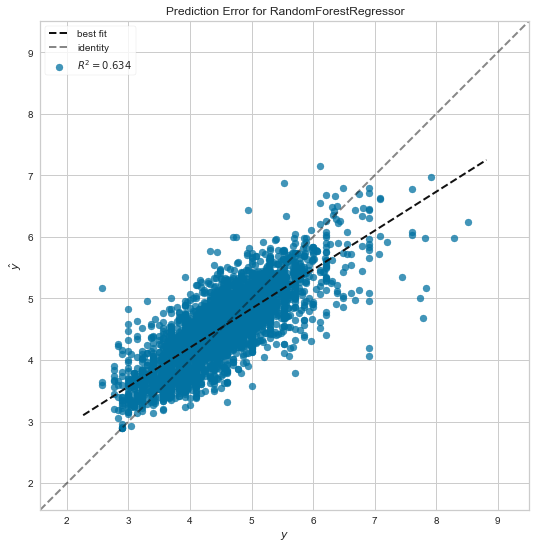

In [213]:
#6.5 Random Forest Regression

# Instantiate the Random Forest Regression model and visualizer
rn = RandomForestRegressor(random_state=0,n_estimators=100)

visualizer = PredictionError(rn)

# Fit the training data to the visualizer
visualizer.fit(X_train, y_train)

# Evaluate the model on the test data
visualizer.score(X_test, y_test)  
g = visualizer.poof()

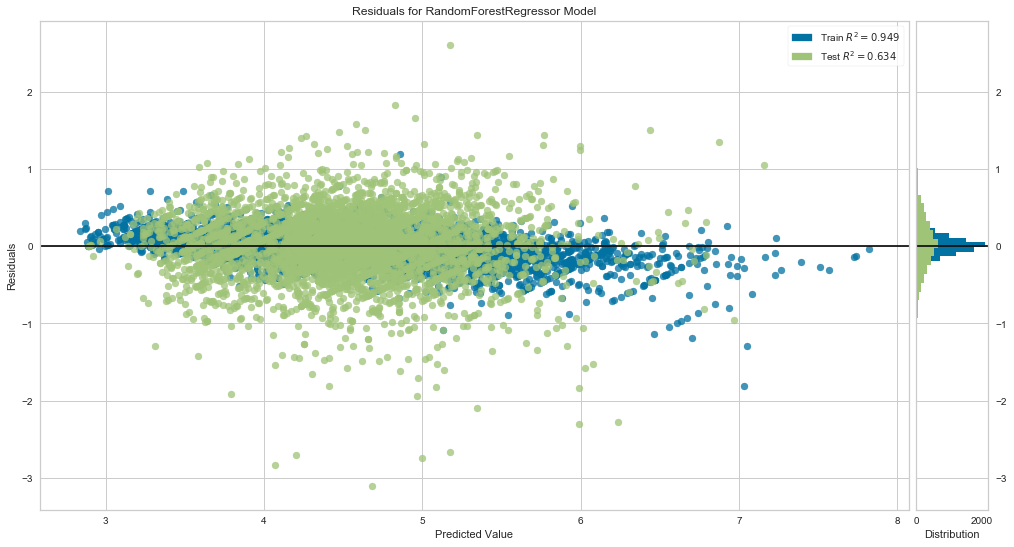

In [214]:
#Instantiate the visualizer
visualizer = ResidualsPlot(rn)

# Fit the training data to the model
visualizer.fit(X_train, y_train)

# Evaluate the model on the test data
visualizer.score(X_test, y_test)  
visualizer.poof()  

In [215]:
#Evaluating the Model
regr = RandomForestRegressor(random_state=0,n_estimators=100)
regr.fit(X_train,y_train)
rfr_pred= regr.predict(X_test)
print('MAE is ' , metrics.mean_absolute_error(rfr_pred,y_test))
print ('Coefficient of Determination:',metrics.r2_score(y_test, rfr_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, rfr_pred))) 
print('Mean Squared Error:', metrics.mean_squared_error(y_test, rfr_pred))

a1 = y_test.ravel()
b1 = rfr_pred.ravel()  
dataf = pd.DataFrame({'Actual': a1, 'Predicted': b1})   
print(dataf.head(20)) 
dataf = dataf.cumsum();

MAE is  0.3113802298704169
Coefficient of Determination: 0.6341835486002143
Root Mean Squared Error: 0.42680558336452046
Mean Squared Error: 0.18216300599112864
      Actual  Predicted
0   4.859812   4.868944
1   4.382027   4.435232
2   3.688879   3.353756
3   4.934474   4.758742
4   4.442651   4.183852
5   4.499810   4.242461
6   4.867534   4.469052
7   4.663439   4.543296
8   5.010635   4.532220
9   3.912023   4.232701
10  4.779123   4.836309
11  4.488636   4.443391
12  4.234107   4.639206
13  4.442651   4.391535
14  4.094345   4.017109
15  4.976734   4.741653
16  4.787492   4.647468
17  4.499810   4.853193
18  4.867534   5.315791
19  3.828641   3.929320


Mean Absolute Error: 0.34744161069646
Mean Squared Error: 0.22253342708180635
Root Mean Squared Error: 0.47173448790798234
variance: 0.5531123996885302
      Actual  Predicted
0   4.859812   5.157621
1   4.382027   4.527459
2   3.688879   3.408272
3   4.934474   4.511902
4   4.442651   4.341293
5   4.499810   4.295943
6   4.867534   4.329055
7   4.663439   4.703206
8   5.010635   4.512396
9   3.912023   4.556219
10  4.779123   4.834932
11  4.488636   4.417292
12  4.234107   4.438672
13  4.442651   4.361394
14  4.094345   4.066370
15  4.976734   4.774905
16  4.787492   4.742999
17  4.499810   4.562803
18  4.867534   5.403247
19  3.828641   3.766498


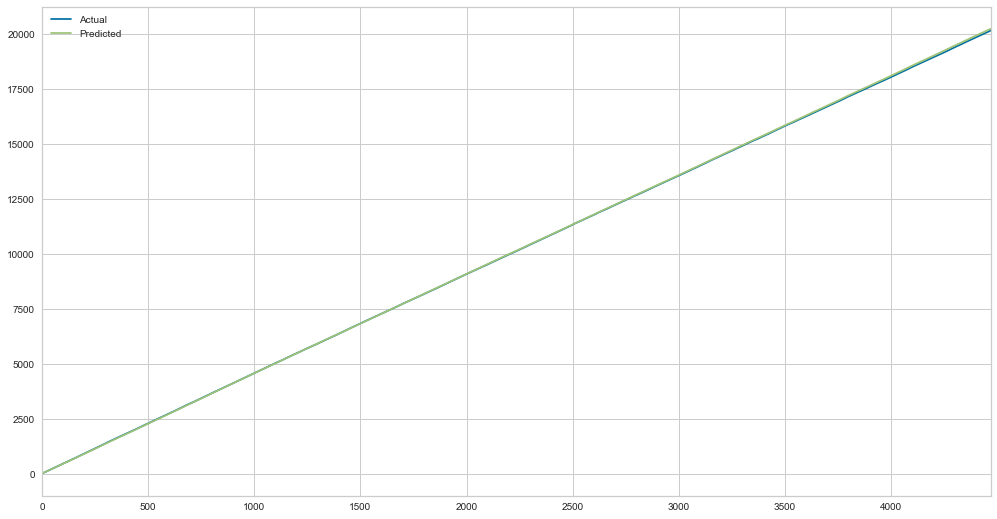

In [43]:
#6.6 Ridge Regressor
from sklearn.linear_model import Ridge,Lasso,BayesianRidge

ridge = Ridge()
ridge.fit(X_train,y_train)

rdg_pred = ridge.predict(X_test)
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, rdg_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, rdg_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, rdg_pred))) 
print ('variance:',metrics.r2_score(y_test, rdg_pred))
a1 = y_test.ravel()
b1 = rdg_pred.ravel()  
dataf = pd.DataFrame({'Actual': a1, 'Predicted': b1})   
print(dataf.head(20)) 
dataf = dataf.cumsum();
dataf.plot();

Mean Absolute Error: 0.358789115416405
Mean Squared Error: 0.2353163718370961
Root Mean Squared Error: 0.485094188624329
variance: 0.5366494603356142
      Actual  Predicted
0   4.382027   4.624984
1   3.912023   4.243466
2   4.382027   4.599837
3   5.010635   5.220072
4   5.068904   4.584518
5   3.970292   4.764955
6   4.787492   4.769465
7   4.595120   4.601418
8   3.401197   3.484354
9   3.218876   3.759296
10  4.867534   4.474449
11  4.976734   4.707898
12  4.595120   4.898251
13  3.555348   4.523359
14  3.951244   4.556443
15  3.688879   3.877156
16  5.278115   5.512590
17  4.158883   4.558390
18  3.828641   4.642646
19  5.783825   5.219073


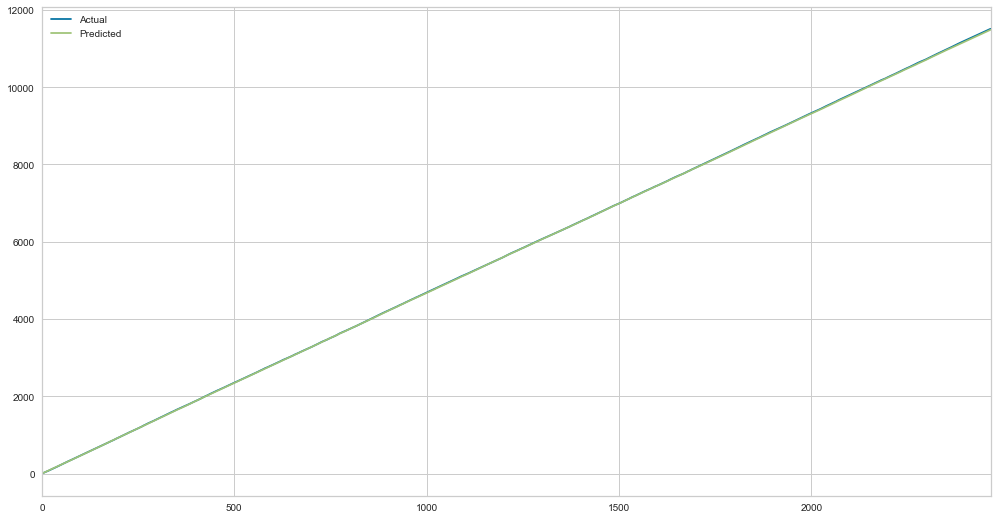

In [133]:
# 6.7 Bayesian Regressor

br = BayesianRidge()
br.fit(X_train,y_train)
br_pred = br.predict(X_test)

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, br_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, br_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, br_pred))) 
print ('variance:',metrics.r2_score(y_test, br_pred))
a1 = y_test.ravel()
b1 = br_pred.ravel()  
dataf = pd.DataFrame({'Actual': a1, 'Predicted': b1})   
print(dataf.head(20)) 
dataf = dataf.cumsum();
dataf.plot();

Mean Absolute Error: 0.5258642211451632
Mean Squared Error: 0.4841670548523134
Root Mean Squared Error: 0.6958211371123426
variance: 0.02770448408507109
      Actual  Predicted
0   4.859812   4.670450
1   4.382027   4.512982
2   3.688879   4.457493
3   4.934474   4.426852
4   4.442651   4.426852
5   4.499810   4.426350
6   4.867534   4.588146
7   4.663439   4.426852
8   5.010635   4.427155
9   3.912023   4.479979
10  4.779123   4.444508
11  4.488636   4.484004
12  4.234107   4.426852
13  4.442651   4.519976
14  4.094345   4.426350
15  4.976734   4.652543
16  4.787492   4.583013
17  4.499810   4.427103
18  4.867534   4.544877
19  3.828641   4.437013


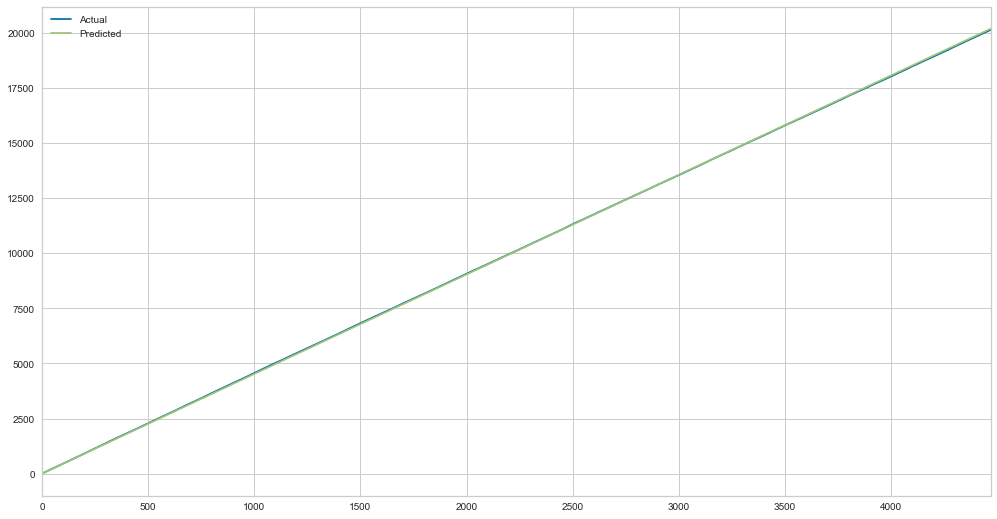

In [45]:
# 6.8 Lasso Regressor
lasso = Lasso()
lasso.fit(X_train,y_train)
las_pred = lasso.predict(X_test)
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, las_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, las_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, las_pred))) 
print ('variance:',metrics.r2_score(y_test, las_pred))
a1 = y_test.ravel()
b1 = las_pred.ravel()  
dataf = pd.DataFrame({'Actual': a1, 'Predicted': b1})   
print(dataf.head(20)) 
dataf = dataf.cumsum();
dataf.plot();

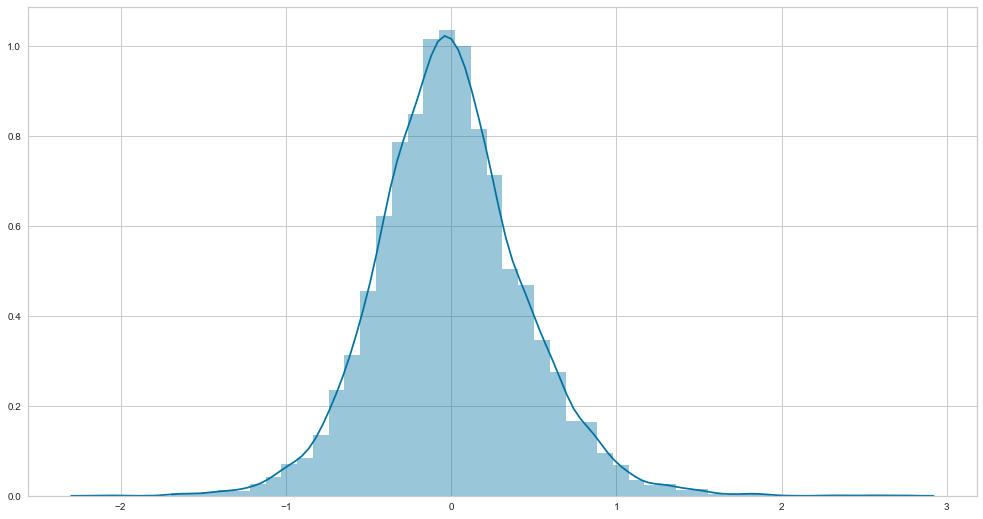

In [82]:
#Plotting Residuals
plt.sca
sns.distplot((y_test-rfr_pred),bins=50);

In [43]:
from sklearn.svm import lasso


ImportError: cannot import name 'lasso' from 'sklearn.svm' (C:\Users\Pravinaben\Anaconda3\lib\site-packages\sklearn\svm\__init__.py)

In [45]:
#6.6 To Summarize Mean Squared Error For All the Models
mse=[]
Regressors=['Linear Regression','Decision Tree','KNN','SVM','Random Forest Regressor']
models=[LinearRegression(),DecisionTreeRegressor(),KNeighborsRegressor(n_neighbors=10),SVR(gamma='auto'),RandomForestRegressor(random_state=0,n_estimators=100)]
for i in models:
    model = i
    model.fit(X_train,y_train)
    y_pred=model.predict(X_test)
    mse.append(metrics.mean_squared_error(y_test,y_pred))
models_dataframe=pd.DataFrame(mse,index=Regressors)   
models_dataframe.columns=['MSE']
models_dataframe

,MSE
Linear Regression,0.210228
Decision Tree,0.357166
KNN,0.335443
SVM,0.279594
Random Forest Regressor,0.179843


In [216]:
#To Summarize
from sklearn.linear_model import LinearRegression,Ridge,Lasso,BayesianRidge

mse=[]
Regressors=['Linear Regression','SVR','Decision Tree','KNN','Random Forest','Ridge','Bayesian Ridge','Lasso']
models=[LinearRegression(),SVR(kernel = 'rbf'),DecisionTreeRegressor(),KNeighborsRegressor(n_neighbors=10),RandomForestRegressor(random_state=0,n_estimators=100),Ridge(),BayesianRidge(),Lasso()]
for i in models:
    model = i
    model.fit(X_train,y_train)
    y_pred=model.predict(X_test)
    mse.append(metrics.mean_squared_error(y_test,y_pred))
models_dataframe=pd.DataFrame(mse,index=Regressors)   
models_dataframe.columns=['MSE']
models_dataframe

C:\Users\Pravinaben\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


,MSE
Linear Regression,0.221435
SVR,0.290851
Decision Tree,0.362825
KNN,0.344398
Random Forest,0.182163
Ridge,0.221049
Bayesian Ridge,0.221053
Lasso,0.479412


In [177]:
#6.7 To Summarize variance For All the Models
var=[]
Regressors=['Linear Regression','Decision Tree','KNN','SVM','Random Forest Regressor']
models=[LinearRegression(),DecisionTreeRegressor(),KNeighborsRegressor(n_neighbors=10),SVR(gamma='auto'),RandomForestRegressor(random_state=0,n_estimators=100)]
for i in models:
    model = i
    model.fit(X_train,y_train)
    y_pred=model.predict(X_test)
    var.append(metrics.r2_score(y_test,y_pred))
models_dataframe=pd.DataFrame(var,index=Regressors)   
models_dataframe.columns=['R2 score']
models_dataframe

,R2 score
Linear Regression,0.555318
Decision Tree,0.274747
KNN,0.308387
SVM,0.415919
Random Forest Regressor,0.634184


In [203]:
#6.7 To Summarize variance For All the Models
from sklearn.linear_model import LinearRegression,Ridge,Lasso,BayesianRidge


var=[]
Regressors=['Linear Regression','SVR','Decision Tree','KNN','Random Forest','Ridge','Bayesian Ridge','Lasso']
models=[LinearRegression(),SVR(kernel = 'rbf'),DecisionTreeRegressor(),KNeighborsRegressor(n_neighbors=10),RandomForestRegressor(random_state=0,n_estimators=100),Ridge(),BayesianRidge(),Lasso()]
for i in models:
    model = i
    model.fit(X_train,y_train)
    y_pred=model.predict(X_test)
    var.append(metrics.r2_score(y_test,y_pred))
models_dataframe=pd.DataFrame(var,index=Regressors)   
models_dataframe.columns=['R2 score']
models_dataframe

C:\Users\Pravinaben\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


,R2 score
Linear Regression,0.555318
SVR,0.415919
Decision Tree,0.275548
KNN,0.308387
Random Forest,0.634184
Ridge,0.556093
Bayesian Ridge,0.556086
Lasso,0.037253


In [220]:
#7 Cross Validation

#7.1 Cross Validation for linear Regression Model
X = newdataset.iloc[: ,1: -1].values
y = newdataset.iloc[: , -1].values

In [217]:
#7.1 Cross validation for Linear regression
from sklearn.model_selection import cross_val_score
lm = LinearRegression()

scores = cross_val_score(lm, X, y, cv= 8)
print('Accuracy of every fold in cross validation:', abs(scores))
print('Mean of the validation score:', abs(scores.mean()))
Mscores = cross_val_score(lm, X, y, cv=8, scoring='neg_mean_squared_error')
print('MSE of every fold in cross validation:', -Mscores)
print('MEan of MSE:', -Mscores.mean())

Accuracy of every fold in cross validation: [0.57486271 0.59361205 0.5388506  0.51439184 0.60239875 0.53332458
 0.56746384 0.49703521]
Mean of the validation score: 0.5527424475785188
MSE of every fold in cross validation: [0.15741595 0.19285576 0.22343683 0.22916046 0.21831153 0.23273965
 0.2533794  0.23290451]
MEan of MSE: 0.21752551112166219


In [253]:
#7.2 Cross validation for Random Forest

rf = RandomForestRegressor(random_state=0,n_estimators=100)

scores = cross_val_score(rf, X, y, cv= 8)
print('Accuracy of every fold in cross validation:', abs(scores))
print('Mean of the validation score:', abs(scores.mean()))
Mscores = cross_val_score(rf, X, y, cv=8, scoring='neg_mean_squared_error')
print('MSE of every fold in cross validation:', -Mscores)
print('MEan of MSE:', -Mscores.mean())

Accuracy of every fold in cross validation: [0.58601173 0.6280794  0.61367998 0.587715   0.66416508 0.58091999
 0.61700571 0.53068831]
Mean of the validation score: 0.601033149153377
MSE of every fold in cross validation: [0.15328779 0.17649891 0.18718039 0.19455896 0.1843974  0.20900294
 0.2243578  0.217321  ]
MEan of MSE: 0.1933256483249125


In [222]:
#7.3 Cross validation for KNN

kn = KNeighborsRegressor(n_neighbors=12)

scores = cross_val_score(kn, X, y, cv= 8)
print('Accuracy of every fold in cross validation:', abs(scores))
print('Mean of the validation score:', abs(scores.mean()))
Mscores = cross_val_score(kn, X, y, cv=8, scoring='neg_mean_squared_error')
print('MSE of every fold in cross validation:', -Mscores)
print('MEan of MSE:', -Mscores.mean())

Accuracy of every fold in cross validation: [0.20764569 0.34630828 0.31449581 0.30694417 0.34155514 0.2555207
 0.2537903  0.19811684]
Mean of the validation score: 0.27804711572739493
MSE of every fold in cross validation: [0.2933857  0.31021641 0.33214157 0.32705586 0.36153333 0.37128558
 0.43712915 0.37132263]
MEan of MSE: 0.3505087790924355


In [223]:
#7.4 Cross validation for Decision tree

dt = DecisionTreeRegressor(random_state=10)

scores = cross_val_score(dt, X, y, cv= 8)
print('Accuracy of every fold in cross validation:', abs(scores))
print('Mean of the validation score:', abs(scores.mean()))
Mscores = cross_val_score(dt, X, y, cv=8, scoring='neg_mean_squared_error')
print('MSE of every fold in cross validation:', -Mscores)
print('MEan of MSE:', -Mscores.mean())

Accuracy of every fold in cross validation: [0.052507   0.27510441 0.25737279 0.21459258 0.30617688 0.21380927
 0.29134416 0.02952259]
Mean of the validation score: 0.20505371072193013
MSE of every fold in cross validation: [0.35082903 0.34400697 0.3598189  0.37063694 0.38095853 0.39208784
 0.41513013 0.44939243]
MEan of MSE: 0.38285759748565373


In [224]:
#7.5 Cross validation for SVR

svr = SVR(gamma='auto')

scores = cross_val_score(svr, X, y, cv= 8)
print('Accuracy of every fold in cross validation:', abs(scores))
print('Mean of the validation score:', abs(scores.mean()))
Mscores = cross_val_score(svr, X, y, cv=8, scoring='neg_mean_squared_error')
print('MSE of every fold in cross validation:', -Mscores)
print('MEan of MSE:', -Mscores.mean())

KeyboardInterrupt: 

In [119]:
# 8.1  Analysis for checking hypothesis
#taking only 4 variables

X = newdataset[[ 
    'room_type_Entire home/apt',
    'accommodates',
    'beds', 'bedrooms', 'cleaning_log','security_log','cancellation_policy_strict_14_with_grace_period']]
y = newdataset['price_log']

In [51]:
X = newdataset.iloc[: ,1 :-1].values
y = newdataset.iloc[: , -1].values

In [52]:
#8.2 Training and testing data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [53]:
X.head(4)

AttributeError: 'numpy.ndarray' object has no attribute 'head'

In [54]:
print(X_train.shape)

(10438, 82)


In [122]:
#8.3 Linear Regression
#Evaluating the Model
from sklearn import metrics
lm = LinearRegression()

#Train/fit lm on the training data
lm.fit(X_train,y_train)
lm.score(X_test,y_test)
predictions = lm.predict( X_test)
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))
print('Coefficient of Determination:',metrics.r2_score(y_test, predictions))
print(lm.score(X_test, y_test))
a1 = y_test.ravel()
b1 = predictions.ravel()  
dataf = pd.DataFrame({'Actual': a1, 'Predicted': b1})   
print(dataf.head(20)) 
dataf = dataf.cumsum();

MAE: 0.3859250006174065
MSE: 0.2641820852564395
RMSE: 0.5139864640790062
Coefficient of Determination: 0.4798113245687182
0.47981132456871817
      Actual  Predicted
0   4.382027   4.255496
1   3.912023   4.156883
2   4.382027   4.628260
3   5.010635   4.991309
4   5.068904   4.548546
5   3.970292   4.739132
6   4.787492   4.738512
7   4.595120   4.580833
8   3.401197   3.423722
9   3.218876   3.633962
10  4.867534   4.626969
11  4.976734   4.824989
12  4.595120   5.065386
13  3.555348   4.426237
14  3.951244   4.487625
15  3.688879   3.925464
16  5.278115   5.417983
17  4.158883   4.226864
18  3.828641   4.562508
19  5.783825   4.993549


In [123]:
#8.4 random forest
#Evaluating the Model
regr = RandomForestRegressor(random_state=0,n_estimators=100)
regr.fit(X_train,y_train)
rfr_pred= regr.predict(X_test)
print('MAE is ' , metrics.mean_absolute_error(rfr_pred,y_test))
print ('Coefficient of Determination:',metrics.r2_score(y_test, rfr_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, rfr_pred))) 
print('Mean Squared Error:', metrics.mean_squared_error(y_test, rfr_pred))

a1 = y_test.ravel()
b1 = rfr_pred.ravel()  
dataf = pd.DataFrame({'Actual': a1, 'Predicted': b1})   
print(dataf.head(20)) 
dataf = dataf.cumsum();

MAE is  0.3662274828473863
Coefficient of Determination: 0.5132098451167643
Root Mean Squared Error: 0.49721260308946896
Mean Squared Error: 0.24722037267100583
      Actual  Predicted
0   4.382027   4.126377
1   3.912023   4.244361
2   4.382027   4.484871
3   5.010635   5.116127
4   5.068904   4.886913
5   3.970292   4.812666
6   4.787492   4.655934
7   4.595120   4.751239
8   3.401197   4.080754
9   3.218876   3.432784
10  4.867534   4.702566
11  4.976734   4.796024
12  4.595120   5.139550
13  3.555348   3.539194
14  3.951244   4.578666
15  3.688879   3.603170
16  5.278115   5.033957
17  4.158883   4.440197
18  3.828641   4.624012
19  5.783825   5.046096


In [124]:
#8.4 Cross validation for Random Forest
rf = RandomForestRegressor(random_state=0,n_estimators=100)

scores = cross_val_score(rf, X, y, cv= 15)
print('Accuracy of every fold in cross validation:', abs(scores))
print('Mean of the validation score:', abs(scores.mean()))
Mscores = cross_val_score(rf, X, y, cv=15, scoring='neg_mean_squared_error')
print('MSE of every fold in cross validation:', -Mscores)
print('MEan of MSE:', -Mscores.mean())

Accuracy of every fold in cross validation: [0.35087257 0.46768887 0.36081311 0.48744944 0.51297518 0.56514389
 0.3607907  0.42765448 0.55932785 0.47663201 0.3831932  0.42809648
 0.54996316 0.37254045 0.28858378]
Mean of the validation score: 0.43944834546395006
MSE of every fold in cross validation: [0.19852994 0.2038421  0.24683123 0.26279251 0.22449192 0.23832896
 0.24854853 0.25039077 0.23970788 0.26329976 0.29060365 0.29705876
 0.34022877 0.300658   0.38253945]
MEan of MSE: 0.26585681502376896


In [125]:
#8.5 Cross validation for Linear Regression

lm = LinearRegression()

scores = cross_val_score(lm, X, y, cv= 15)
print('Accuracy of every fold in cross validation:', abs(scores))
print('Mean of the validation score:', abs(scores.mean()))
Mscores = cross_val_score(lm, X, y, cv=15, scoring='neg_mean_squared_error')
print('MSE of every fold in cross validation:', -Mscores)
print('MEan of MSE:', -Mscores.mean())

Accuracy of every fold in cross validation: [0.41728201 0.52044084 0.43933687 0.52065723 0.47312765 0.53115201
 0.4357533  0.41361464 0.56476287 0.44881388 0.40402184 0.4414172
 0.46177369 0.38263343 0.31952212]
Mean of the validation score: 0.4516206370820918
MSE of every fold in cross validation: [0.17821919 0.18364137 0.21650815 0.24576637 0.24285946 0.25695869
 0.21940026 0.25653294 0.23675145 0.2772947  0.28079041 0.2901397
 0.40690019 0.29582177 0.36590343]
MEan of MSE: 0.263565873041785


In [233]:
#6 Modelling 
#Training and Testing data

X = newdataset.iloc[: , 1:-1]
y = newdataset.iloc[: , -1]

In [226]:
X.head(2)

,host_listings_count,accommodates,bathrooms,bedrooms,beds,guests_included,availability_365,number_of_reviews,review_scores_rating,reviews_per_month,...,property_type_Townhouse,property_type_Villa,instant_bookable_f,instant_bookable_t,cancellation_policy_flexible,cancellation_policy_moderate,cancellation_policy_strict,cancellation_policy_strict_14_with_grace_period,cancellation_policy_super_strict_30,cancellation_policy_super_strict_60
1,6.0,2,1.0,1.0,1.0,1,232,125,88.0,1.02,...,0,0,0,1,0,1,0,0,0,0
3,3.0,4,1.0,1.0,2.0,2,292,293,93.0,2.65,...,0,0,1,0,0,1,0,0,0,0


In [234]:
#30 percent of the data is allocated for testing
# random state is set not to introduce sampling bias

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

C:\Users\Pravinaben\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[23:46:10] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.

Training MSE: 0.1772
Validation MSE: 0.1964

Training r2: 0.6389
Validation r2: 0.6055


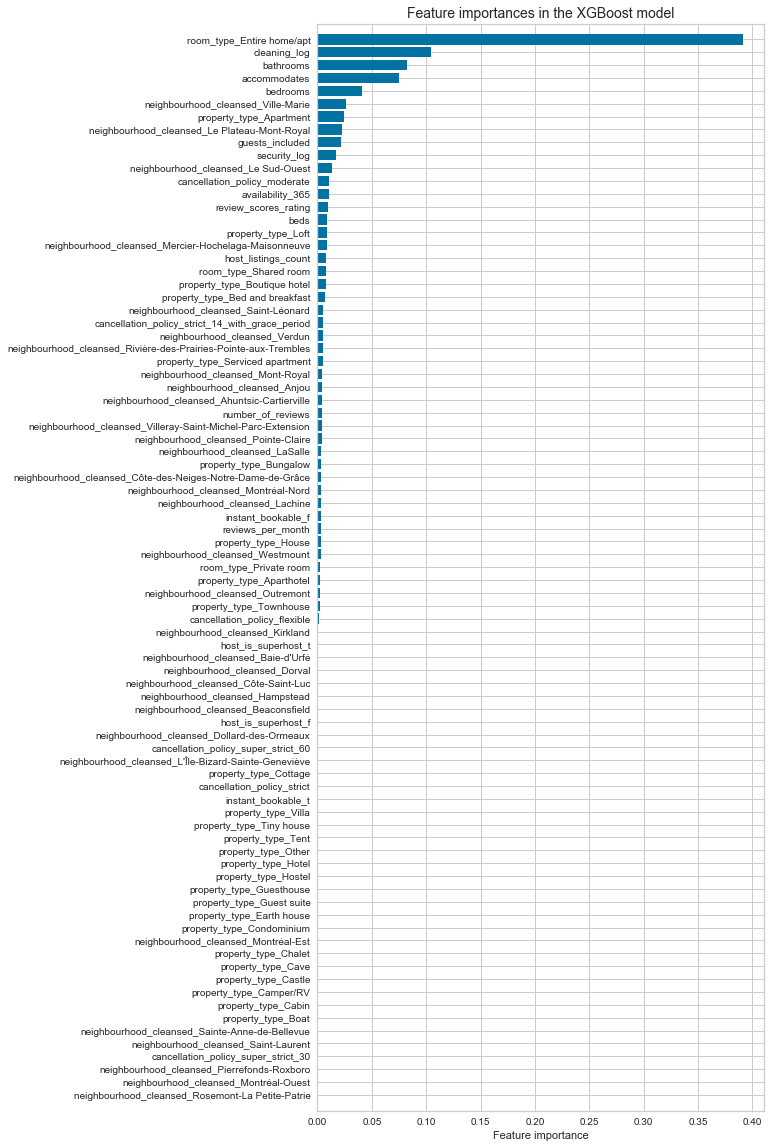

In [235]:
import xgboost as xgb
from sklearn import metrics

# Fitting the model
xgb_reg = xgb.XGBRegressor()
xgb_reg.fit(X_train, y_train)
training_preds_xgb_reg = xgb_reg.predict(X_train)
val_preds_xgb_reg = xgb_reg.predict(X_test)

# Printing the results
#print(f"Time taken to run: {round((xgb_reg_end - xgb_reg_start)/60,1)} minutes")
print("\nTraining MSE:", round(metrics.mean_squared_error(y_train, training_preds_xgb_reg),4))
print("Validation MSE:", round(metrics.mean_squared_error(y_test, val_preds_xgb_reg),4))
print("\nTraining r2:", round(metrics.r2_score(y_train, training_preds_xgb_reg),4))
print("Validation r2:", round(metrics.r2_score(y_test, val_preds_xgb_reg),4))

# Producing a dataframe of feature importances
ft_weights_xgb_reg = pd.DataFrame(xgb_reg.feature_importances_,columns=['weight'], index=X_train.columns)
ft_weights_xgb_reg.sort_values('weight', inplace=True)

# Plotting feature importances
plt.figure(figsize=(8,20))
plt.barh(ft_weights_xgb_reg.index, ft_weights_xgb_reg.weight, align='center') 
plt.title("Feature importances in the XGBoost model", fontsize=14)
plt.xlabel("Feature importance")
plt.margins(y=0.01)
plt.show()


In [65]:
dataset.groupby(by='price_log').count()[['id']].sort_values(by='id', ascending=False).head(10)


,id
price_log,
4.382027,649
4.605170,638
3.912023,619
4.330733,486
5.010635,485
4.094345,396
4.499810,377
4.248495,358
5.293305,356


In [71]:
dataset['price_log'].min()

2.302585092994046

In [130]:
# convert review_scores_rating into buckets
def convert_scores_buckets(val):
    if  val >= 2.0 and val < 4.0:
        return '1'
    elif val >= 4.0 and val < 6.0:
        return '2'
    elif val >= 6.0 and val < 8.0:
        return '3'
    elif val >= 8.0 :
        return '4'
    
    
dataset['price_log'] = dataset['price_log'].apply(convert_scores_buckets)
print ('Unique Values in the Column:'), np.unique(dataset['price_log'])


TypeError: '>=' not supported between instances of 'str' and 'float'

In [236]:
#models for Classification
from sklearn.linear_model import LogisticRegression
from sklearn import svm
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import BaggingClassifier, AdaBoostClassifier


In [256]:
df2 = newdataset

    
output = []
df2.loc[df2['price_log']>= 4.0, output.append] = 1
df2.loc[df2['price_log']< 4.0, output.append] = 0

        
df2.rename(columns= {'nan':'output'},inplace=True)

#yc = df2.iloc[:,1].values

df2 = df2.drop("price_log", axis=1)


Xt = df2[[ 
    'room_type_Entire home/apt',
    'accommodates',
    'bathrooms', 'bedrooms', 'cleaning_log','neighbourhood_cleansed_Le Plateau-Mont-Royal',
    'neighbourhood_cleansed_Ville-Marie', 'property_type_Apartment','guests_included', 'security_log',
    'neighbourhood_cleansed_Le Sud-Ouest','room_type_Shared room','availability_365','property_type_Loft','beds',
    'neighbourhood_cleansed_Mercier-Hochelaga-Maisonneuve','cancellation_policy_moderate','review_scores_rating']].values

yt = df2.iloc[:,-1].values

In [240]:
df2.isnull().sum()

id                                                            0
host_listings_count                                           0
accommodates                                                  0
bathrooms                                                     0
bedrooms                                                      0
beds                                                          0
guests_included                                               0
availability_365                                              0
number_of_reviews                                             0
review_scores_rating                                          0
reviews_per_month                                             0
cleaning_log                                                  0
security_log                                                  0
room_type_Entire home/apt                                     0
room_type_Private room                                        0
room_type_Shared room                   

In [257]:
Xt_train,Xt_test,yt_train,yt_test = train_test_split(Xt,yt,test_size=0.25,random_state=0)


C:\Users\Pravinaben\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


The accuracy of Logistic Regression is 0.868421052631579
Precision: 0.8932767624020888
Recall: 0.9437931034482758
Fscore: 0.9178403755868544


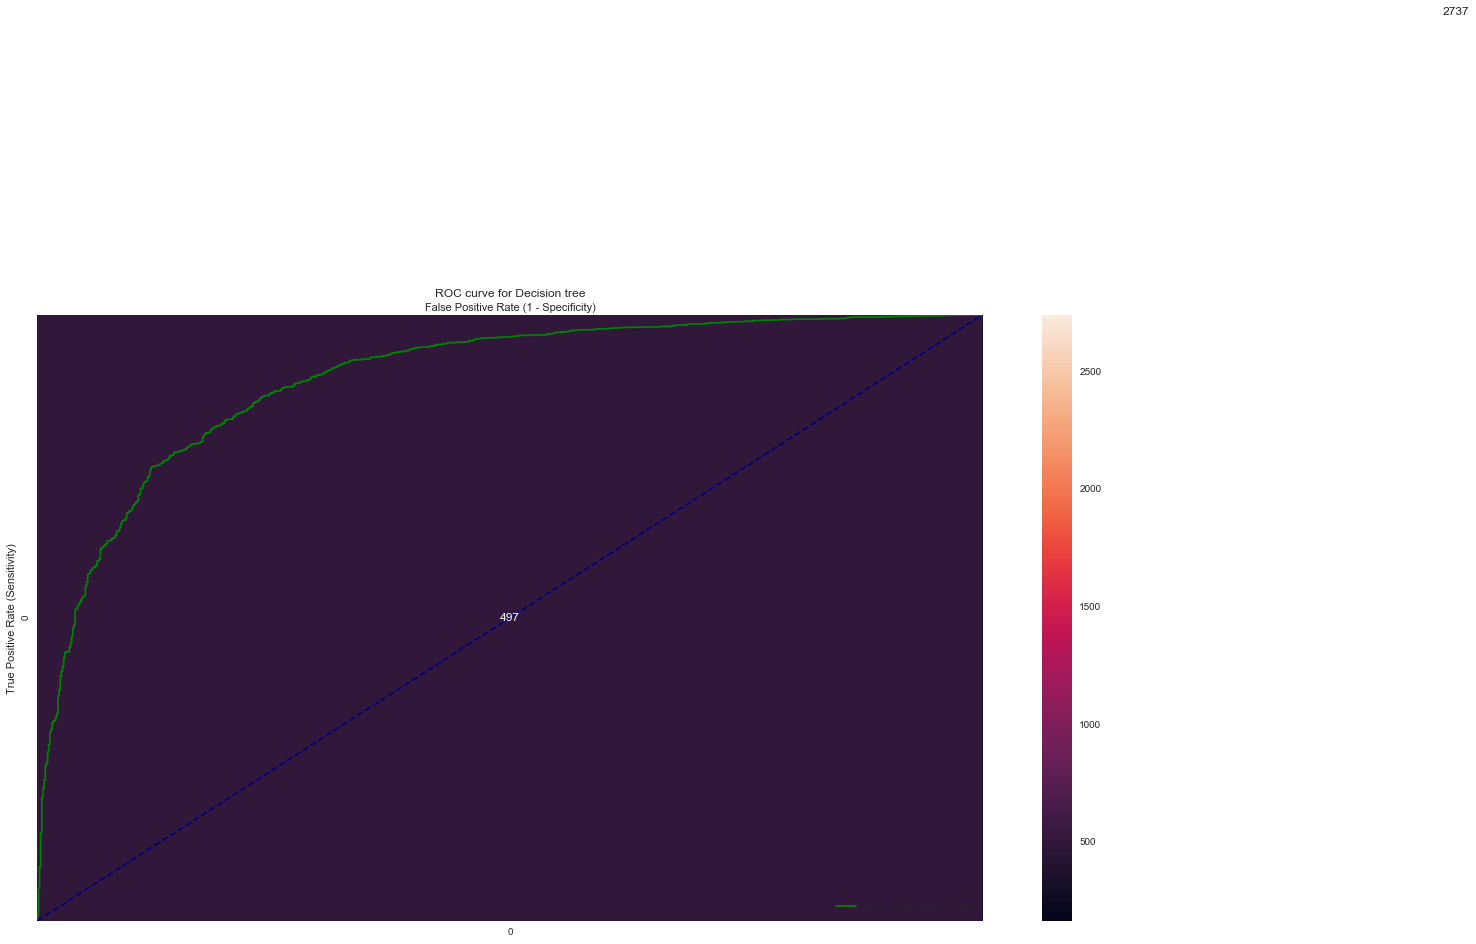

In [243]:
#models for Classification

# Logistic Regression

logreg = LogisticRegression(random_state=0)

logreg.fit(Xt_train,yt_train)

yt_pred = logreg.predict(Xt_test)

# Confusion matrix, Recall and precision values for logistic regression

from sklearn.metrics import confusion_matrix
cm = confusion_matrix(yt_test,yt_pred)
cnf_matrix = metrics.confusion_matrix(yt_test, yt_pred)
cnf_matrix
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True  ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
print('The accuracy of Logistic Regression is',metrics.accuracy_score(yt_pred,yt_test))
print("Precision:",metrics.precision_score(yt_test, yt_pred))
print("Recall:",metrics.recall_score(yt_test, yt_pred))
print("Fscore:",metrics.f1_score(yt_test,yt_pred))
yt_pred_proba = logreg.predict_proba(Xt_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(yt_test,  yt_pred_proba)
auc = metrics.roc_auc_score(yt_test, yt_pred_proba)
plt.plot(fpr, tpr, color='green', label='ROC curve (area = %0.2f)' % auc)
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.rcParams['font.size'] = 12         
plt.title('ROC curve for Decision tree')        
plt.xlabel('False Positive Rate (1 - Specificity)')        
plt.ylabel('True Positive Rate (Sensitivity)')        
plt.legend(loc="lower right")        
plt.show() 


The accuracy of Random Forest Classifier is 0.8748657357679914
[[ 524  300]
 [ 166 2734]]
The accuracy  0.868421052631579
Precision: 0.8932767624020888
Recall: 0.9437931034482758
Fscore: 0.9178403755868544


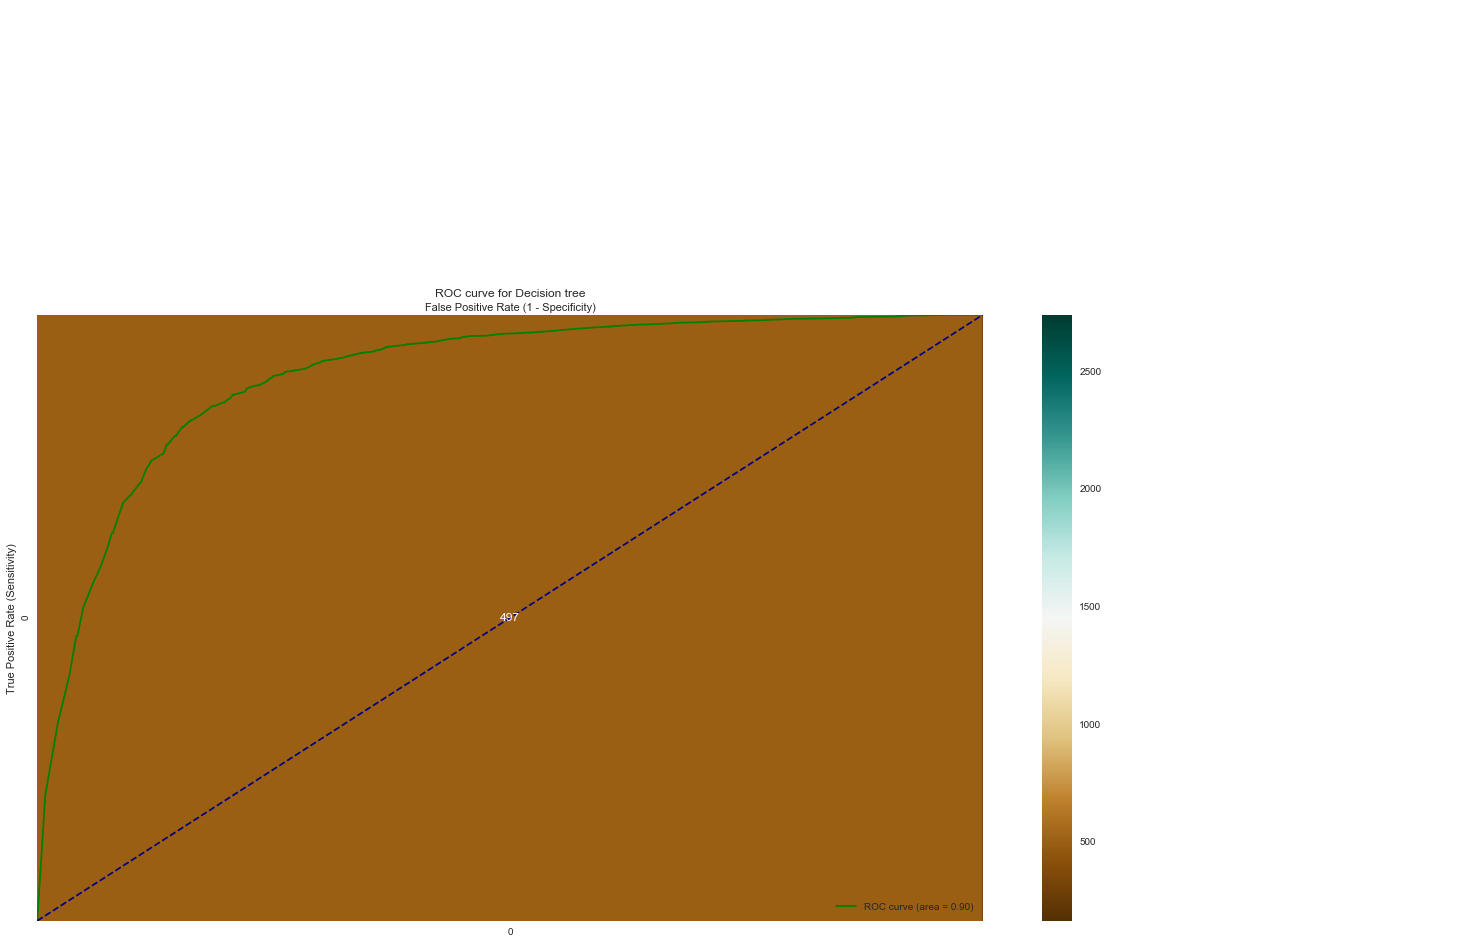

In [244]:
#Random Forest 

rf = RandomForestClassifier(n_estimators=100,random_state=0)

rf.fit(Xt_train,yt_train)
rf_pred = rf.predict(Xt_test)

# Confusion matrix, Recall and precision values for logistic regression

from sklearn.metrics import confusion_matrix
cm = confusion_matrix(yt_test,rf_pred)
print('The accuracy of Random Forest Classifier is',metrics.accuracy_score(rf_pred,yt_test))
print(cm)

cnf_matrix = metrics.confusion_matrix(yt_test, yt_pred)
cnf_matrix
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="BrBG" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
print('The accuracy ',metrics.accuracy_score(yt_pred,yt_test))
print("Precision:",metrics.precision_score(yt_test, yt_pred))
print("Recall:",metrics.recall_score(yt_test, yt_pred))
print("Fscore:",metrics.f1_score(yt_test,yt_pred))
yt_pred_proba = rf.predict_proba(Xt_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(yt_test,  yt_pred_proba)

auc = metrics.roc_auc_score(yt_test, yt_pred_proba)
plt.plot(fpr, tpr, color='green', label='ROC curve (area = %0.2f)' % auc)
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.rcParams['font.size'] = 12         
plt.title('ROC curve for Decision tree')        
plt.xlabel('False Positive Rate (1 - Specificity)')        
plt.ylabel('True Positive Rate (Sensitivity)')        
plt.legend(loc="lower right")        
plt.show() 

In [246]:
from sklearn.model_selection import KFold
kfold = KFold(n_splits=10, random_state=0) # k=10, split the data into 10 equal parts

In [247]:
from sklearn.model_selection import cross_val_score
rf = RandomForestClassifier(n_estimators=100)
scores = cross_val_score(rf, Xt, yt, cv=10)
print("Accuracy for 10 reputaions: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

Accuracy for 10 reputaions: 0.87 (+/- 0.01)


In [249]:
from sklearn.model_selection import cross_val_score
rf = svm.SVC(gamma='scale', probability = True)
scores = cross_val_score(rf, Xt, yt, cv=10)
print("Accuracy for 10 reputaions: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

KeyboardInterrupt: 

In [250]:
from sklearn.model_selection import cross_val_score
rf = LogisticRegression(random_state=0)
scores = cross_val_score(rf, Xt, yt, cv=10)
print("Accuracy for 10 reputaions: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

C:\Users\Pravinaben\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Pravinaben\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Pravinaben\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Pravinaben\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Pravinaben\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Spec

Accuracy for 10 reputaions: 0.87 (+/- 0.02)


In [252]:
dt = LogisticRegression(random_state=0)

scores = cross_val_score(dt, Xt, yt, cv= 8)
print('Accuracy of every fold in cross validation:', abs(scores))
print('Mean of the validation score:', abs(scores.mean()))
Mscores = cross_val_score(dt, X, y, cv=8, scoring='neg_mean_squared_error')
print('MSE of every fold in cross validation:', -Mscores)
print('MEan of MSE:', -Mscores.mean())

C:\Users\Pravinaben\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Pravinaben\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Pravinaben\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Pravinaben\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Pravinaben\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Spec

Accuracy of every fold in cross validation: [0.87647691 0.86358754 0.8453276  0.85499463 0.87701396 0.86573577
 0.87164339 0.87956989]
Mean of the validation score: 0.8667937123915781


C:\Users\Pravinaben\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Pravinaben\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:542: FutureWarning: From version 0.22, errors during fit will result in a cross validation score of NaN by default. Use error_score='raise' if you want an exception raised or error_score=np.nan to adopt the behavior from version 0.22.
  FutureWarning)


ValueError: Unknown label type: 'continuous'

The accuracy of Random Forest Classifier is 0.7787325456498388
[[   0  824]
 [   0 2900]]
The accuracy  0.7787325456498388
Precision: 0.7787325456498388
Recall: 1.0
Fscore: 0.8756038647342995


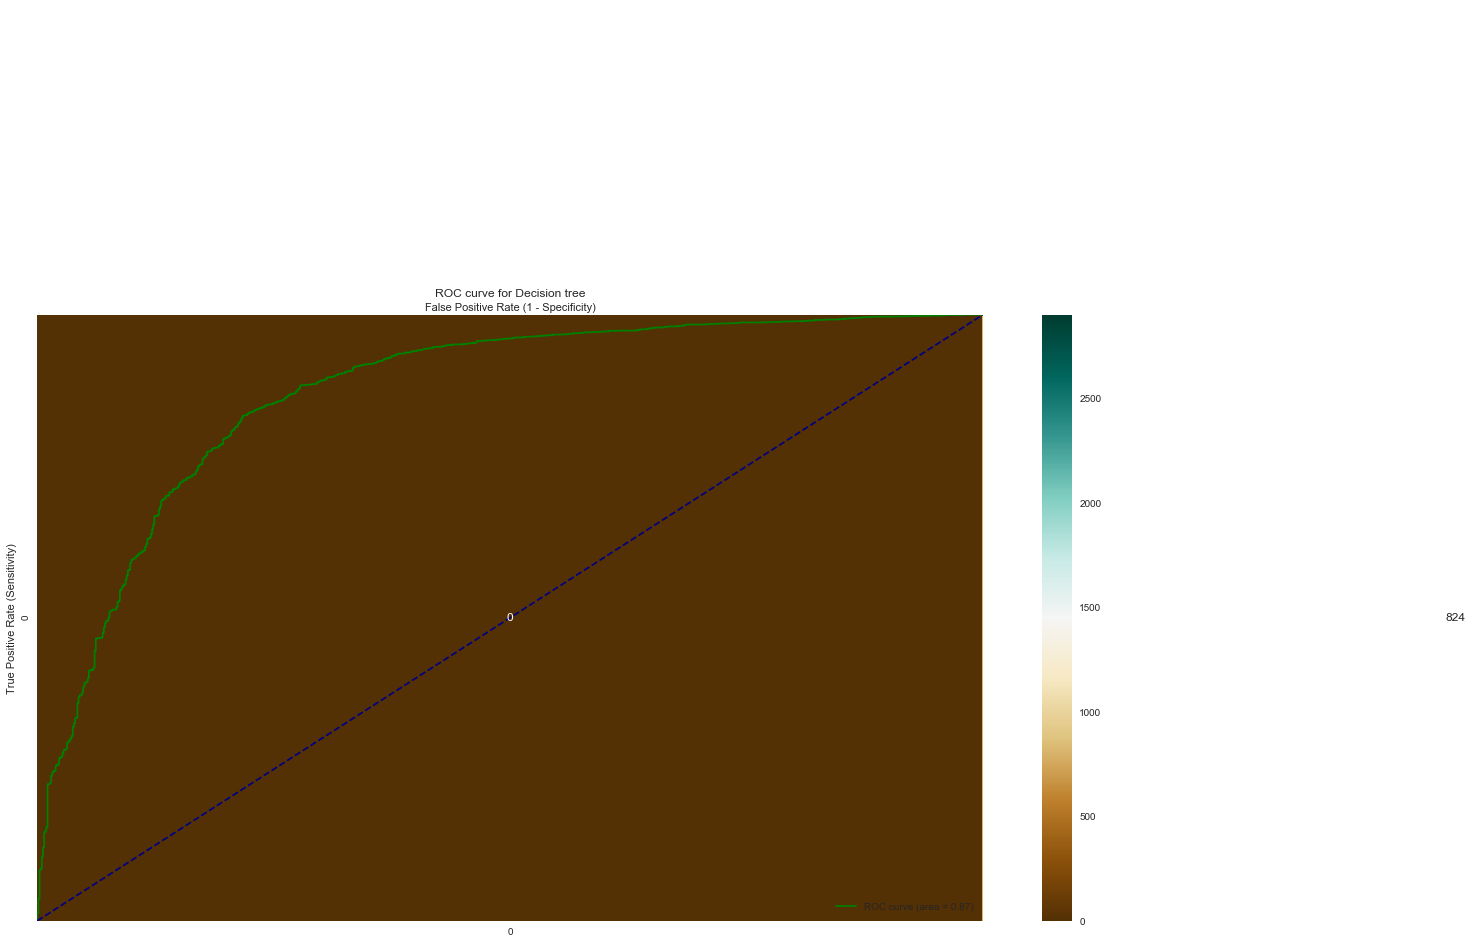

In [245]:
#Random Forest 
from sklearn import svm

clf = svm.SVC(gamma='scale', probability = True)
clf.fit(Xt_train,yt_train)  
#SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
#decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
#max_iter=-1, probability=False, random_state=None, shrinking=True,
#tol=0.001, verbose=False)

clf_pred = clf.predict(Xt_test)

# Confusion matrix, Recall and precision values for logistic regression

from sklearn.metrics import confusion_matrix
cm = confusion_matrix(yt_test,clf_pred)
print('The accuracy of Random Forest Classifier is',metrics.accuracy_score(clf_pred,yt_test))
print(cm)

cnf_matrix = metrics.confusion_matrix(yt_test, clf_pred)
cnf_matrix
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="BrBG" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
print('The accuracy ',metrics.accuracy_score(clf_pred,yt_test))
print("Precision:",metrics.precision_score(yt_test, clf_pred))
print("Recall:",metrics.recall_score(yt_test, clf_pred))
print("Fscore:",metrics.f1_score(yt_test,clf_pred))
clf_pred_proba = clf.predict_proba(Xt_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(yt_test,  clf_pred_proba)

auc = metrics.roc_auc_score(yt_test, clf_pred_proba)
plt.plot(fpr, tpr, color='green', label='ROC curve (area = %0.2f)' % auc)
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.rcParams['font.size'] = 12         
plt.title('ROC curve for Decision tree')        
plt.xlabel('False Positive Rate (1 - Specificity)')        
plt.ylabel('True Positive Rate (Sensitivity)')        
plt.legend(loc="lower right")        
plt.show() 

In [ ]:
print(confusion_matrix(y_test,predictions))
print(classification_report(y_test,predictions))
print(accuracy_score(y_test, predictions))

In [311]:
newdataset = dataset

In [312]:
newdataset

,id,accommodates,bathrooms,bedrooms,beds,amenities,guests_included,availability_365,number_of_reviews,review_scores_rating,...,property_type_Villa,instant_bookable_f,instant_bookable_t,cancellation_policy_flexible,cancellation_policy_moderate,cancellation_policy_strict,cancellation_policy_strict_14_with_grace_period,cancellation_policy_super_strict_30,cancellation_policy_super_strict_60,price_log
1,2843,2,1.0,1.0,1.0,"{Wifi,""Air conditioning"",Kitchen,""Free street ...",1,232,125,88.000000,...,0,0,1,0,1,0,0,0,0,3.401197
3,29059,4,1.0,1.0,2.0,"{TV,Internet,Wifi,Kitchen,""Free street parking...",2,292,293,93.000000,...,0,1,0,0,1,0,0,0,0,4.543295
4,29061,5,1.0,2.0,3.0,"{TV,""Cable TV"",Wifi,Kitchen,Heating,""Family/ki...",2,334,49,92.000000,...,0,0,1,0,1,0,0,0,0,4.976734
5,31847,2,1.0,1.0,1.0,"{Wifi,""Air conditioning"",Kitchen,""Free street ...",1,244,131,89.000000,...,0,0,1,0,1,0,0,0,0,3.401197
7,36301,2,1.0,1.0,1.0,"{TV,""Cable TV"",Internet,Wifi,""Air conditioning...",1,239,34,99.000000,...,0,1,0,0,0,0,1,0,0,4.787492
8,38118,1,1.0,3.0,1.0,"{TV,""Cable TV"",Internet,Wifi,Kitchen,""Pets liv...",1,333,12,87.000000,...,0,1,0,1,0,0,0,0,0,3.828641
9,41819,4,1.0,2.0,3.0,"{TV,""Cable TV"",Wifi,""Air conditioning"",Kitchen...",4,259,351,93.000000,...,0,0,1,0,1,0,0,0,0,4.605170
14,52932,4,1.0,2.0,2.0,"{Wifi,""Air conditioning"",Kitchen,""Free street ...",4,142,165,86.000000,...,0,0,1,0,1,0,0,0,0,3.912023
15,53428,6,3.0,3.0,3.0,"{TV,Internet,Wifi,""Air conditioning"",Kitchen,""...",2,301,37,97.000000,...,0,1,0,0,0,0,1,0,0,5.703782
16,53471,2,1.0,1.0,1.0,"{TV,Wifi,""Air conditioning"",""Free parking on p...",2,58,52,97.000000,...,0,1,0,1,0,0,0,0,0,4.382027


In [313]:
df2 = newdataset

In [314]:

def convert_scores_buckets(val):
    if  val < 3.0:
        return '1'
    elif val >=3.0 and val < 4.0:
        return '2'
    elif val >= 4.0 and val < 5.0:
        return '3'
    elif val >= 5.0 :
        return '4'
    
    
df2['price_log'] = df2['price_log'].apply(convert_scores_buckets)
print ('Unique Values in the Column:'), np.unique(df2['price_log'])
df2['price_log'].head(10)

Unique Values in the Column:


1     2
3     3
4     3
5     2
7     3
8     2
9     3
14    2
15    4
16    3
Name: price_log, dtype: object

In [315]:
df2.price_log.mean()

inf

In [316]:
df2['price_log'].head(10000)

1        2
3        3
4        3
5        2
7        3
8        2
9        3
14       2
15       4
16       3
18       2
20       3
21       3
22       3
23       3
24       3
25       3
29       3
30       4
31       2
32       3
33       4
34       3
35       2
36       3
37       3
40       2
41       3
44       4
46       4
        ..
14331    3
14332    2
14334    3
14336    3
14337    3
14339    3
14340    3
14341    3
14344    2
14345    2
14347    3
14348    4
14349    4
14350    4
14351    3
14353    2
14355    4
14357    2
14361    4
14362    2
14363    1
14364    3
14365    3
14367    1
14368    2
14369    3
14370    2
14371    4
14372    3
14373    3
Name: price_log, Length: 10000, dtype: object

In [317]:
df1 = df2

In [318]:
df1

,id,accommodates,bathrooms,bedrooms,beds,amenities,guests_included,availability_365,number_of_reviews,review_scores_rating,...,property_type_Villa,instant_bookable_f,instant_bookable_t,cancellation_policy_flexible,cancellation_policy_moderate,cancellation_policy_strict,cancellation_policy_strict_14_with_grace_period,cancellation_policy_super_strict_30,cancellation_policy_super_strict_60,price_log
1,2843,2,1.0,1.0,1.0,"{Wifi,""Air conditioning"",Kitchen,""Free street ...",1,232,125,88.000000,...,0,0,1,0,1,0,0,0,0,2
3,29059,4,1.0,1.0,2.0,"{TV,Internet,Wifi,Kitchen,""Free street parking...",2,292,293,93.000000,...,0,1,0,0,1,0,0,0,0,3
4,29061,5,1.0,2.0,3.0,"{TV,""Cable TV"",Wifi,Kitchen,Heating,""Family/ki...",2,334,49,92.000000,...,0,0,1,0,1,0,0,0,0,3
5,31847,2,1.0,1.0,1.0,"{Wifi,""Air conditioning"",Kitchen,""Free street ...",1,244,131,89.000000,...,0,0,1,0,1,0,0,0,0,2
7,36301,2,1.0,1.0,1.0,"{TV,""Cable TV"",Internet,Wifi,""Air conditioning...",1,239,34,99.000000,...,0,1,0,0,0,0,1,0,0,3
8,38118,1,1.0,3.0,1.0,"{TV,""Cable TV"",Internet,Wifi,Kitchen,""Pets liv...",1,333,12,87.000000,...,0,1,0,1,0,0,0,0,0,2
9,41819,4,1.0,2.0,3.0,"{TV,""Cable TV"",Wifi,""Air conditioning"",Kitchen...",4,259,351,93.000000,...,0,0,1,0,1,0,0,0,0,3
14,52932,4,1.0,2.0,2.0,"{Wifi,""Air conditioning"",Kitchen,""Free street ...",4,142,165,86.000000,...,0,0,1,0,1,0,0,0,0,2
15,53428,6,3.0,3.0,3.0,"{TV,Internet,Wifi,""Air conditioning"",Kitchen,""...",2,301,37,97.000000,...,0,1,0,0,0,0,1,0,0,4
16,53471,2,1.0,1.0,1.0,"{TV,Wifi,""Air conditioning"",""Free parking on p...",2,58,52,97.000000,...,0,1,0,1,0,0,0,0,0,3


In [254]:

    
#output = []

#df2.loc[df2['price_log'] == 1, output.append] =  1
#df2.loc[df2['price_log'] == 2, output.append] =  2
#df2.loc[df2['price_log'] == 3, output.append] =  3
#df2.loc[df2['price_log'] == 4, output.append] =  4

        
#df2.rename(columns= {'nan':'price_log'},inplace=True)

#yc = df2.iloc[:,1].values

#df2 = df2.drop("price_log", axis=1)


Xt = df2[[ 
    'room_type_Entire home/apt',
    'accommodates',
    'bathrooms', 'bedrooms', 'cleaning_log','neighbourhood_cleansed_Le Plateau-Mont-Royal',
    'neighbourhood_cleansed_Ville-Marie', 'property_type_Apartment','guests_included', 'security_log',
    'neighbourhood_cleansed_Le Sud-Ouest','room_type_Shared room','availability_365','property_type_Loft','beds',
    'neighbourhood_cleansed_Mercier-Hochelaga-Maisonneuve','cancellation_policy_moderate','review_scores_rating']]

yt = df2.iloc[:,-1]

In [334]:
Xt.head(4)

,room_type_Entire home/apt,accommodates,bathrooms,bedrooms,cleaning_log,neighbourhood_cleansed_Le Plateau-Mont-Royal,neighbourhood_cleansed_Ville-Marie,property_type_Apartment,guests_included,security_log,neighbourhood_cleansed_Le Sud-Ouest,room_type_Shared room,availability_365,property_type_Loft,beds,neighbourhood_cleansed_Mercier-Hochelaga-Maisonneuve,cancellation_policy_moderate,review_scores_rating
1,0,2,1.0,1.0,2.995732,0,0,0,1,4.897840,1,0,232,0,1.0,0,1,88.0
3,1,4,1.0,1.0,4.174387,0,1,1,2,5.873304,0,0,292,0,2.0,0,1,93.0
4,1,5,1.0,2.0,4.605170,0,1,0,2,5.873304,0,0,334,0,3.0,0,1,92.0
5,0,2,1.0,1.0,2.995732,0,0,1,1,4.897840,1,0,244,0,1.0,0,1,89.0


In [255]:
Xt_train,Xt_test,yt_train,yt_test = train_test_split(Xt,yt,test_size=0.25,random_state=0)


In [336]:
#from sklearn import svm



from sklearn.svm import LinearSVC
#from sklearn.datasets import make_classification
#Xt_train, yt_train = make_classification(n_features=18, random_state=0)
clf = LinearSVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='linear', max_iter=-1, probability=True, random_state=None,
    shrinking=False, tol=0.001, verbose=False)

#clf = svm.SVC(gamma='scale', probability = True)
clf.fit(Xt_train,yt_train)  
#SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
#decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
#max_iter=-1, probability=False, random_state=None, shrinking=True,
#tol=0.001, verbose=False)

clf_pred = clf.predict(Xt_test)

# Confusion matrix, Recall and precision values for logistic regression

from sklearn.metrics import confusion_matrix
cm = confusion_matrix(yt_test,clf_pred)
print('The accuracy of Random Forest Classifier is',metrics.accuracy_score(clf_pred,yt_test))
print(cm)

cnf_matrix = metrics.confusion_matrix(yt_test, clf_pred)
cnf_matrix
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="BrBG" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
print('The accuracy ',metrics.accuracy_score(clf_pred,yt_test))
print("Precision:",metrics.precision_score(yt_test, clf_pred))
print("Recall:",metrics.recall_score(yt_test, clf_pred))
print("Fscore:",metrics.f1_score(yt_test,clf_pred))
clf_pred_proba = clf.predict_proba(Xt_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(yt_test,  clf_pred_proba)

auc = metrics.roc_auc_score(yt_test, clf_pred_proba)
plt.plot(fpr, tpr, color='green', label='ROC curve (area = %0.2f)' % auc)
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.rcParams['font.size'] = 12         
plt.title('ROC curve for Decision tree')        
plt.xlabel('False Positive Rate (1 - Specificity)')        
plt.ylabel('True Positive Rate (Sensitivity)')        
plt.legend(loc="lower right")        
plt.show() 

TypeError: __init__() got an unexpected keyword argument 'cache_size'

The accuracy of Random Forest Classifier is 0.8748657357679914
[[ 524  300]
 [ 166 2734]]
The accuracy  0.8748657357679914
Precision: 0.9011206328279499
Recall: 0.9427586206896552
Fscore: 0.9214694978092349


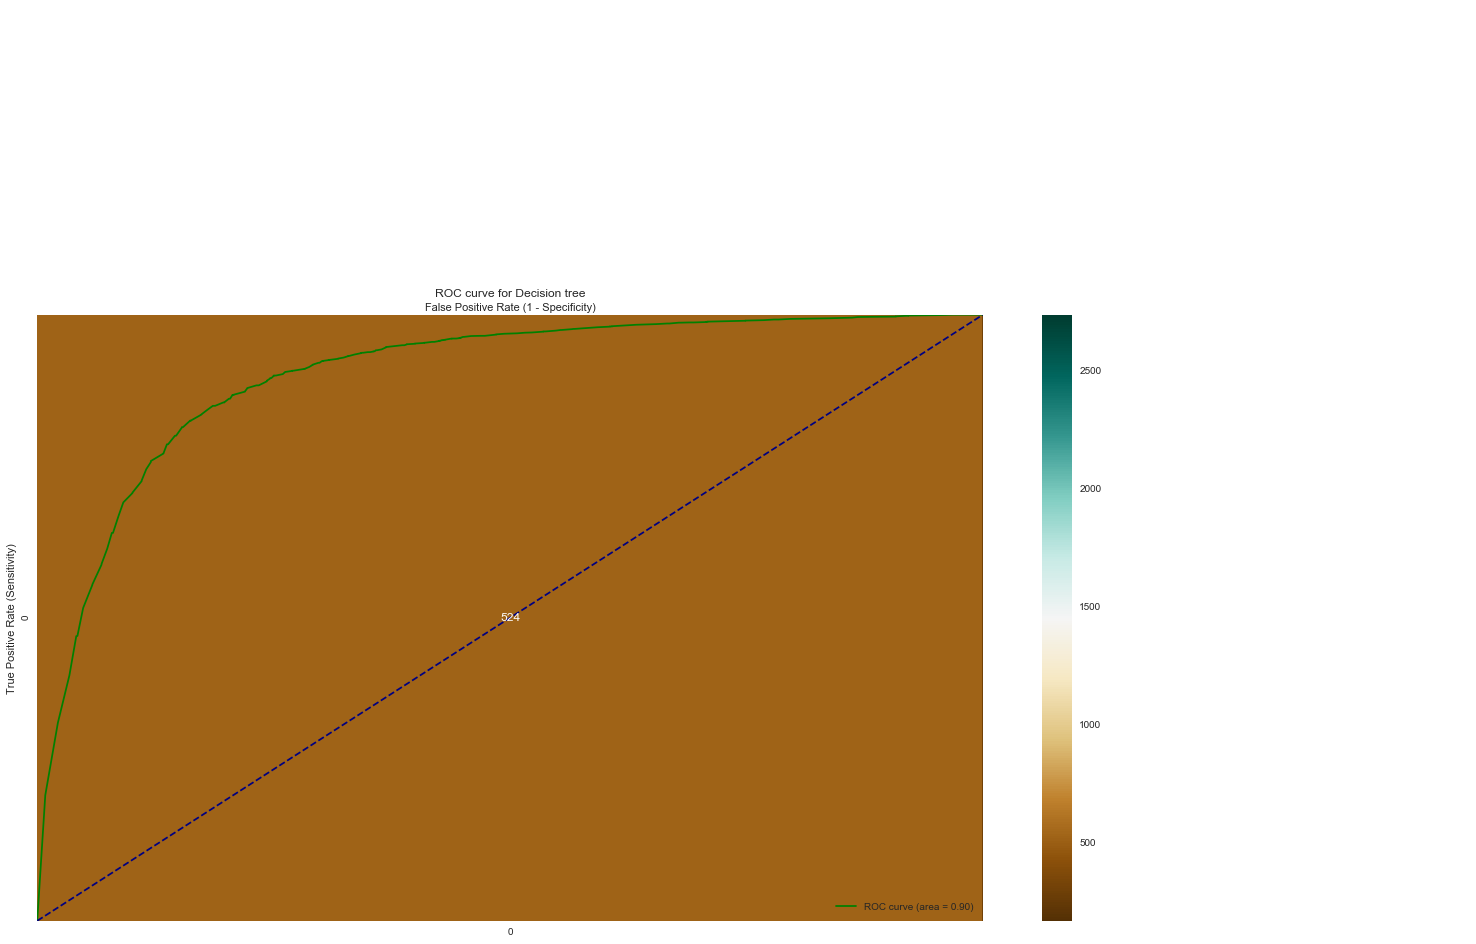

In [258]:
rf = RandomForestClassifier(n_estimators=100,random_state=0)

rf.fit(Xt_train,yt_train)
rf_pred = rf.predict(Xt_test)

# Confusion matrix, Recall and precision values for logistic regression

from sklearn.metrics import confusion_matrix
cm = confusion_matrix(yt_test,rf_pred)
print('The accuracy of Random Forest Classifier is',metrics.accuracy_score(rf_pred,yt_test))
print(cm)

cnf_matrix = metrics.confusion_matrix(yt_test, rf_pred)
cnf_matrix
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="BrBG" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
print('The accuracy ',metrics.accuracy_score(rf_pred,yt_test))
print("Precision:",metrics.precision_score(yt_test, rf_pred))
print("Recall:",metrics.recall_score(yt_test, rf_pred))
print("Fscore:",metrics.f1_score(yt_test,rf_pred))
rf_pred_proba = rf.predict_proba(Xt_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(yt_test,  rf_pred_proba)

auc = metrics.roc_auc_score(yt_test, rf_pred_proba)
plt.plot(fpr, tpr, color='green', label='ROC curve (area = %0.2f)' % auc)
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.rcParams['font.size'] = 12         
plt.title('ROC curve for Decision tree')        
plt.xlabel('False Positive Rate (1 - Specificity)')        
plt.ylabel('True Positive Rate (Sensitivity)')        
plt.legend(loc="lower right")        
plt.show() 

In [259]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC
from sklearn.model_selection import cross_val_score
models = [
    RandomForestClassifier(n_estimators=200, max_depth=3, random_state=0),
    LinearSVC(),
    MultinomialNB(),
    LogisticRegression(random_state=0),
]
CV = 5
cv_df = pd.DataFrame(index=range(CV * len(models)))
entries = []
for model in models:
  model_name = model.__class__.__name__
  accuracies = cross_val_score(model, features, labels, scoring='accuracy', cv=CV)
  for fold_idx, accuracy in enumerate(accuracies):
    entries.append((model_name, fold_idx, accuracy))
cv_df = pd.DataFrame(entries, columns=['model_name', 'fold_idx', 'accuracy'])
import seaborn as sns
sns.boxplot(x='model_name', y='accuracy', data=cv_df)
sns.stripplot(x='model_name', y='accuracy', data=cv_df, 
              size=8, jitter=True, edgecolor="gray", linewidth=2)
plt.show()

NameError: name 'MultinomialNB' is not defined